In [2]:
import os
import time
import torch
import argparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from collections import defaultdict
from utils import add_noise
from models import VAE

In [4]:
dataset = MNIST(
        root='data', train=True, transform=transforms.ToTensor(),
        download=True)
data_loader = DataLoader(
        dataset=dataset, batch_size=64, shuffle=True)

In [59]:
device = torch.device("cuda")
images = [sample_i for sample_i in data_loader.sampler.data_source.train_data]
print(images[0].shape)
vae = VAE(
        encoder_layer_sizes=[784, 400, 200, 100],
        latent_size=2,
        decoder_layer_sizes=[100, 200, 400, 784],
        # conditional=args.conditional,
        num_labels=10).to(device)

torch.Size([28, 28])


0.2 5


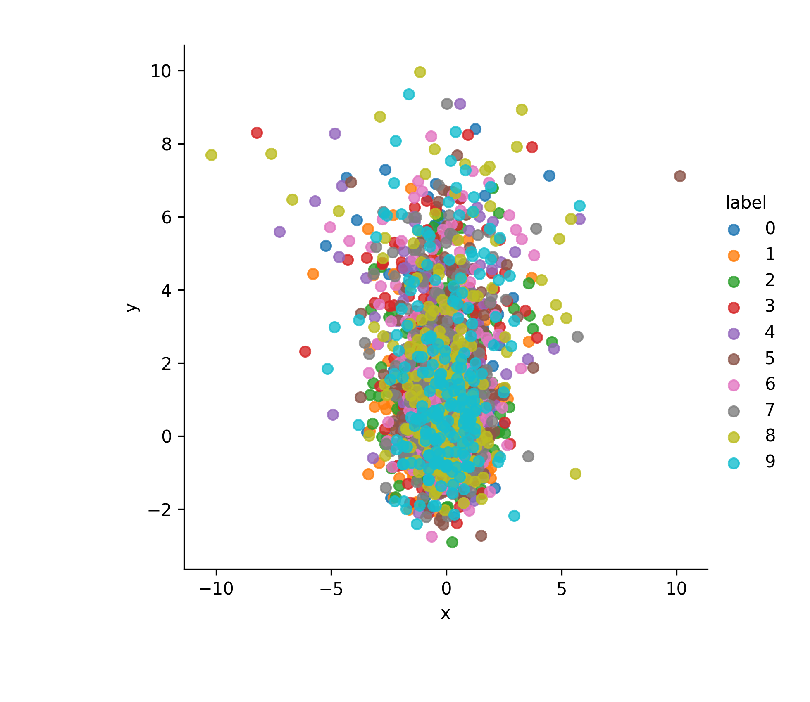

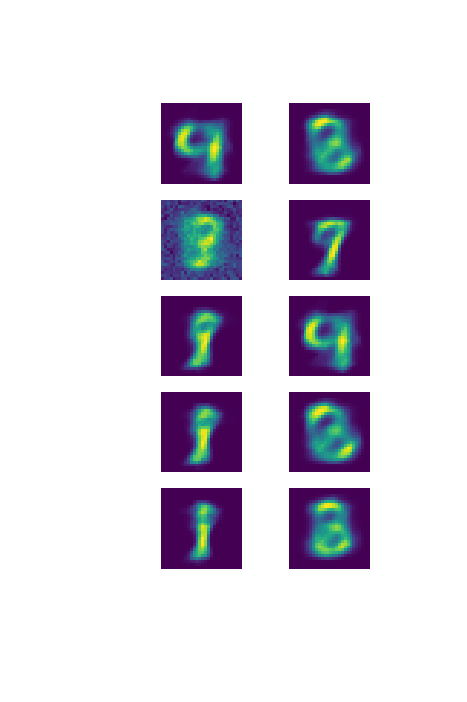

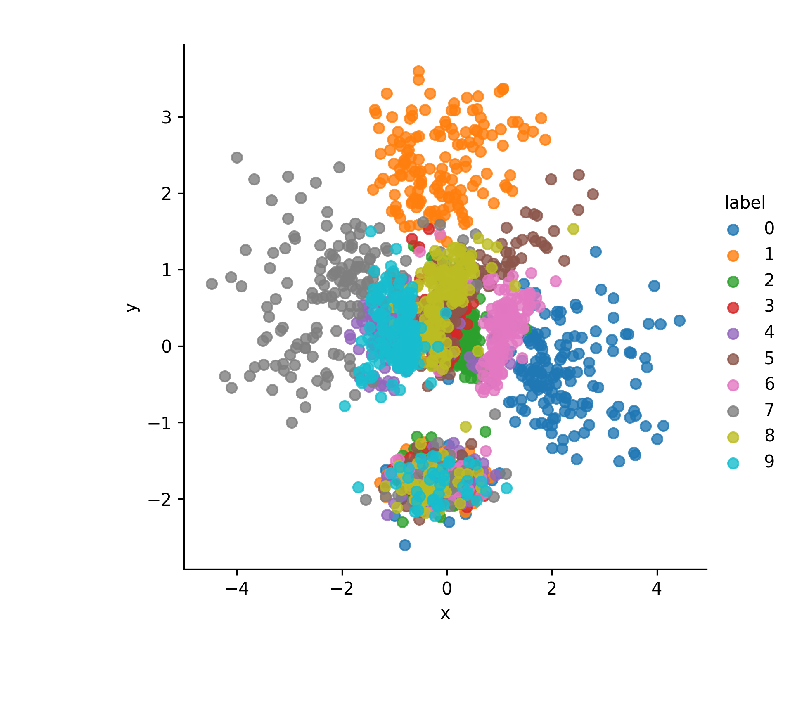

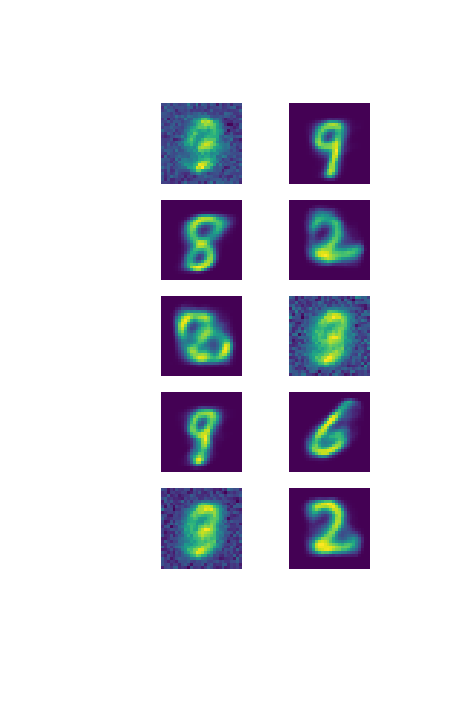

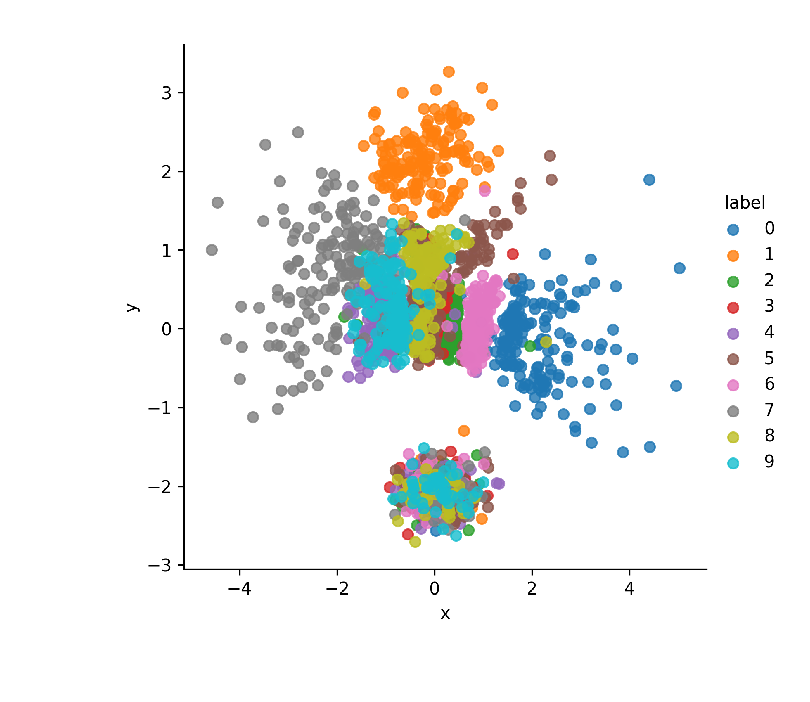

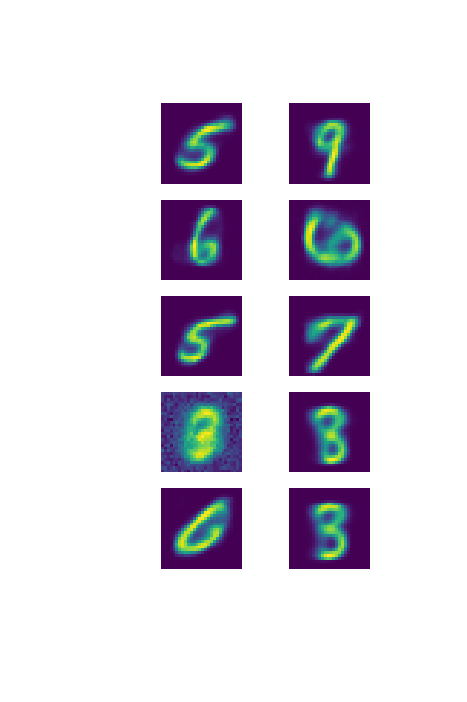

0.2 20
0.5 5


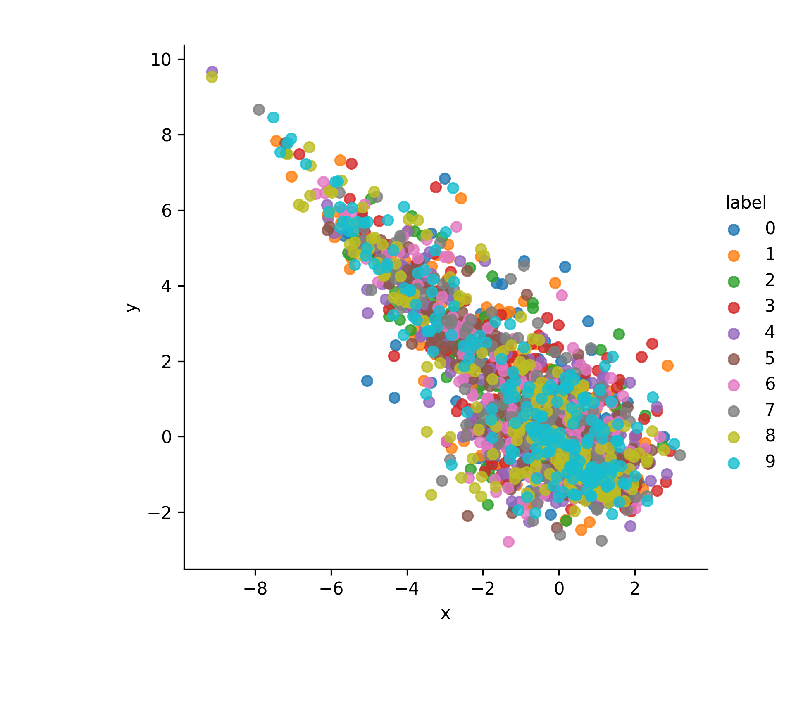

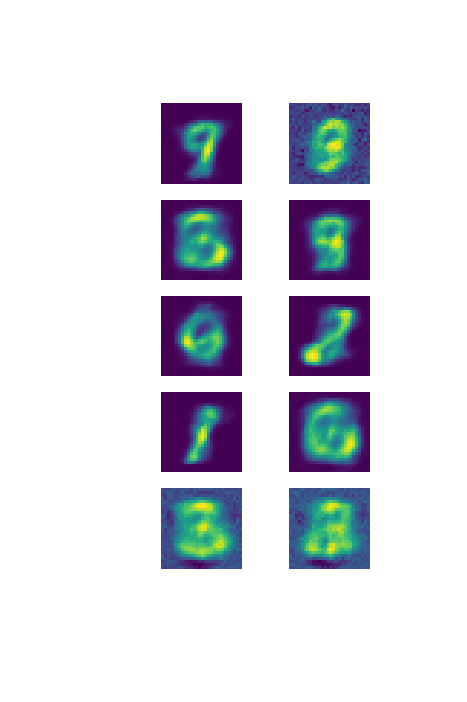

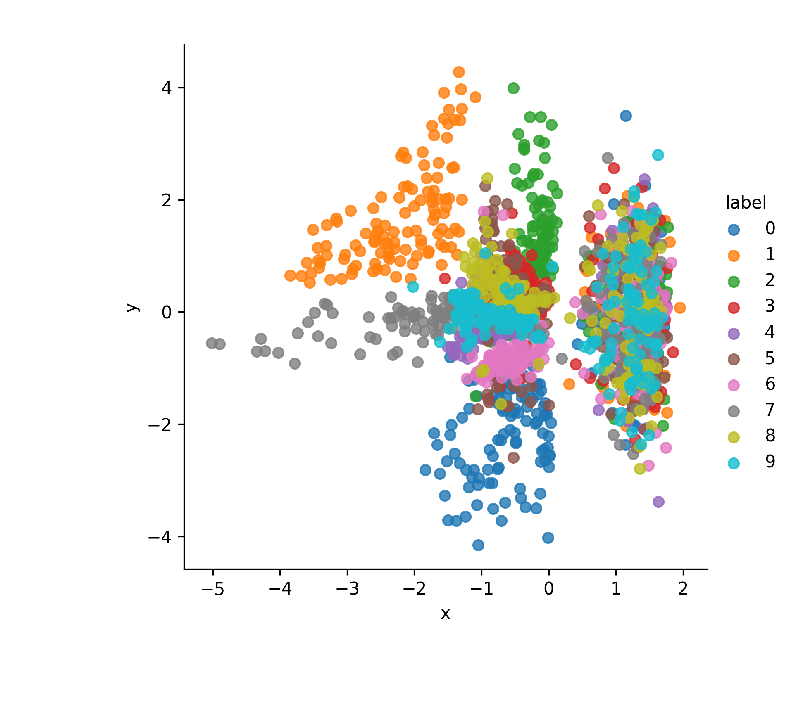

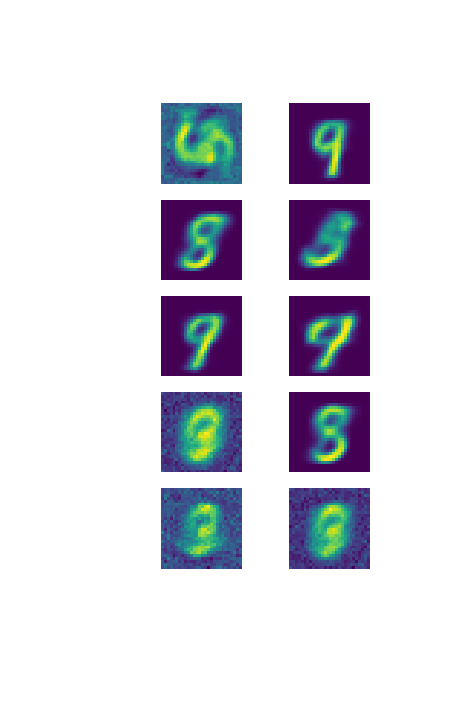

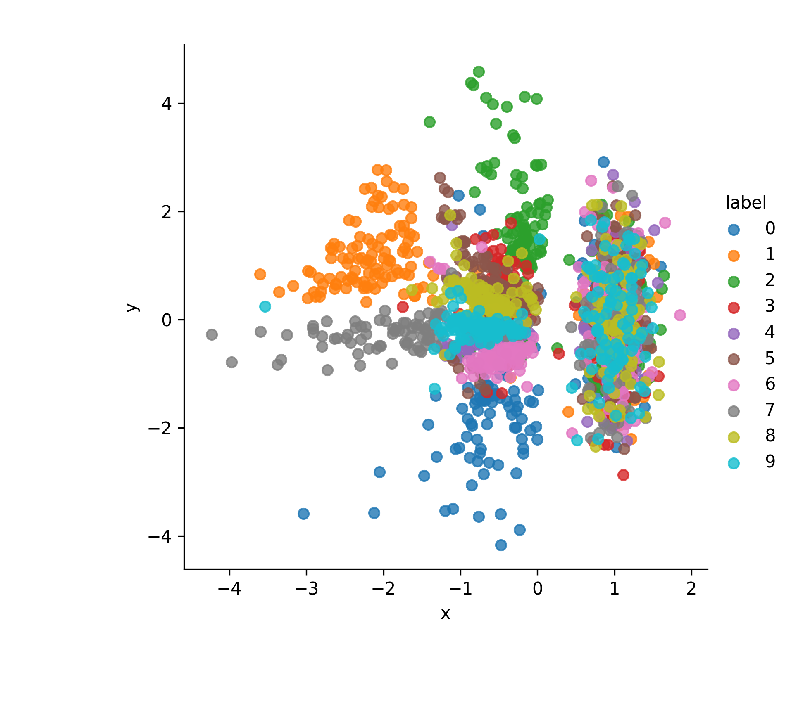

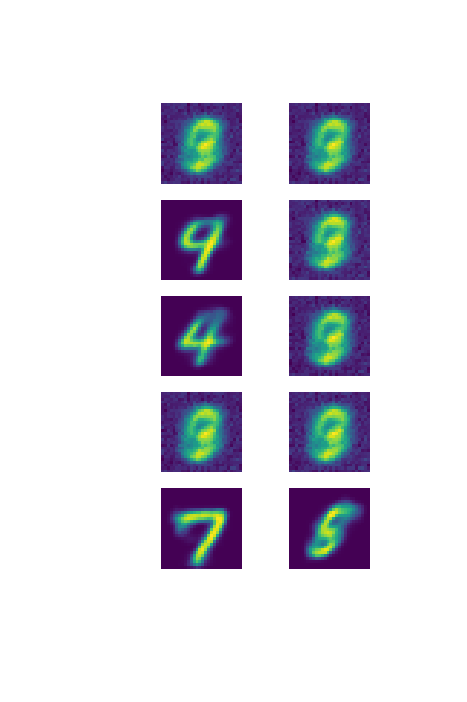

0.5 20


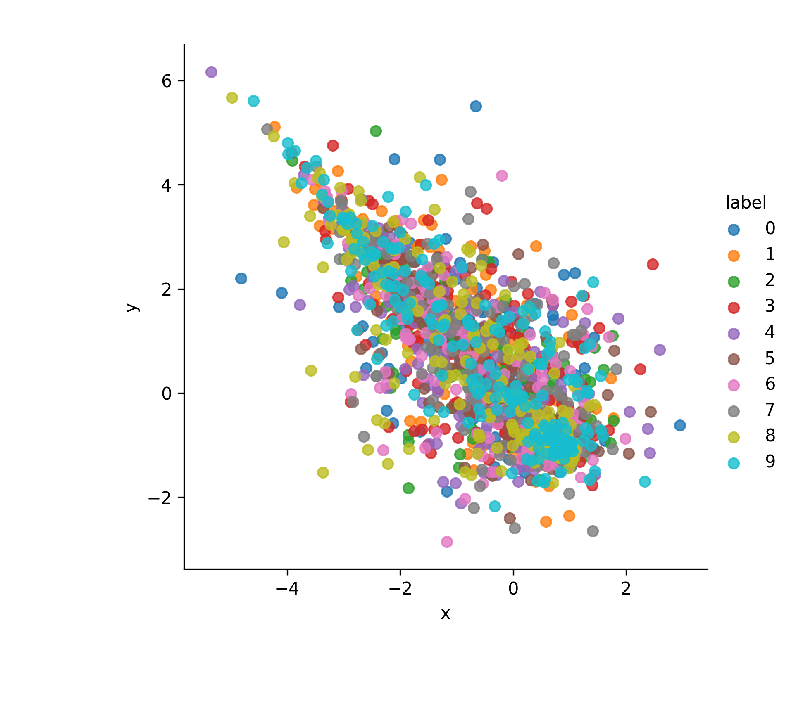

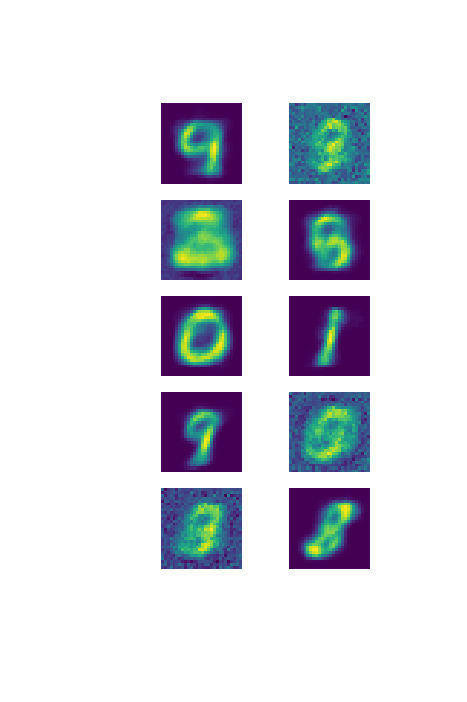

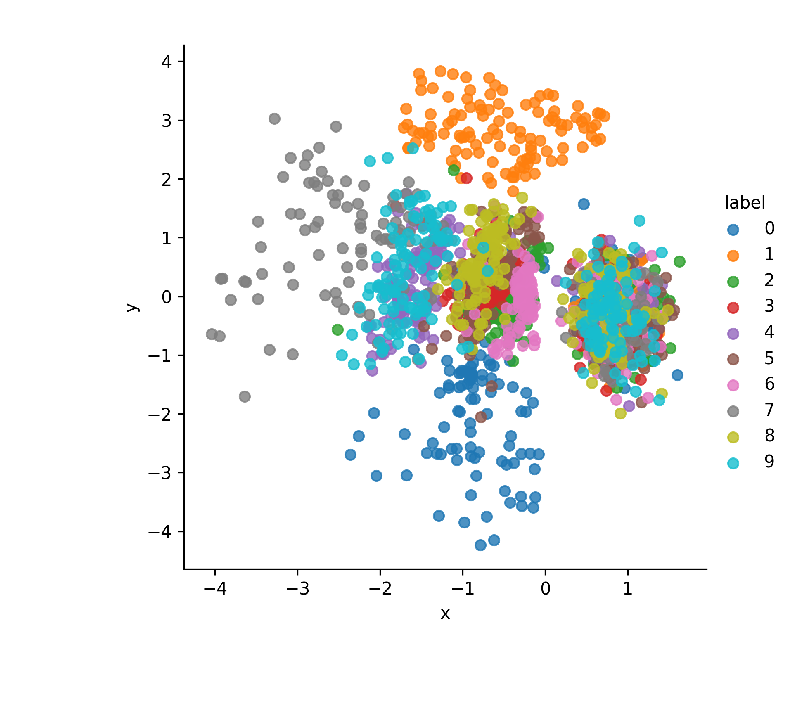

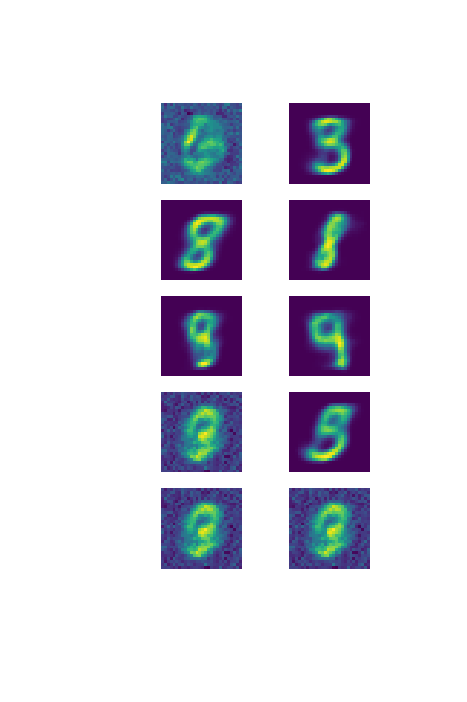

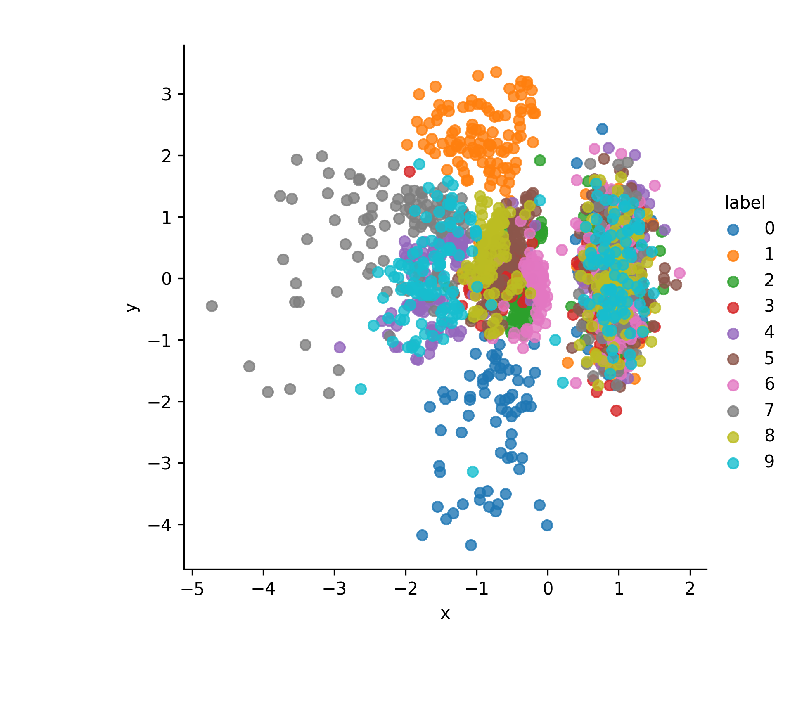

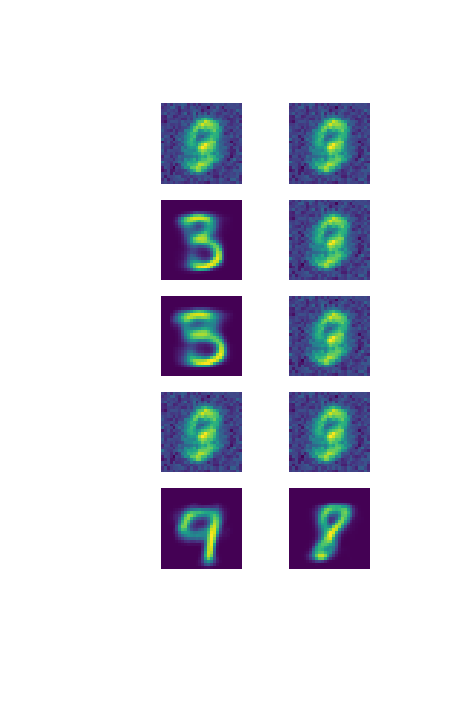

0.9 5
0.9 20


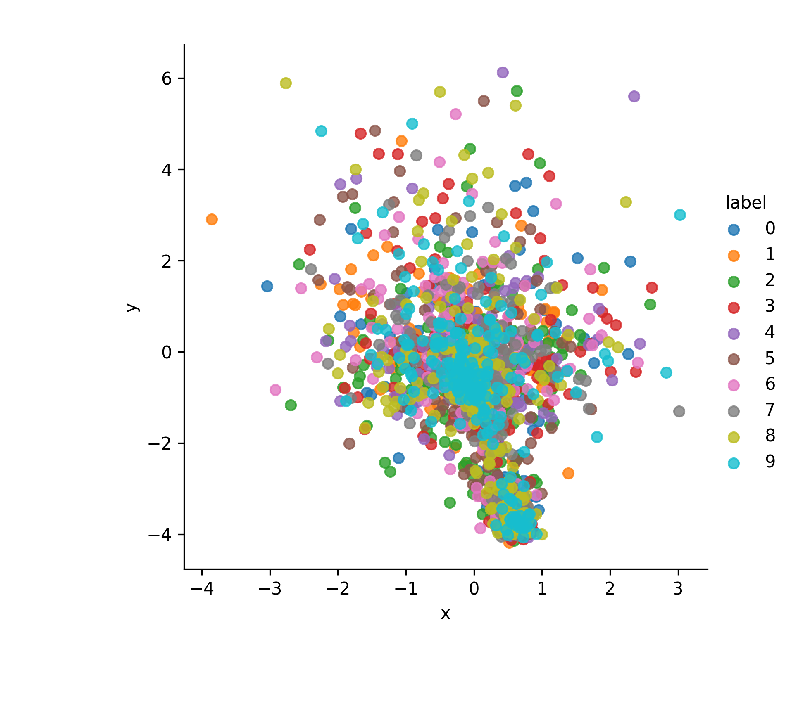

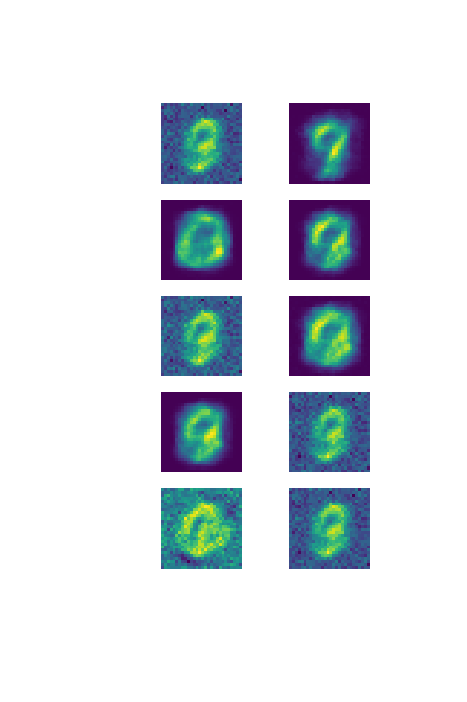

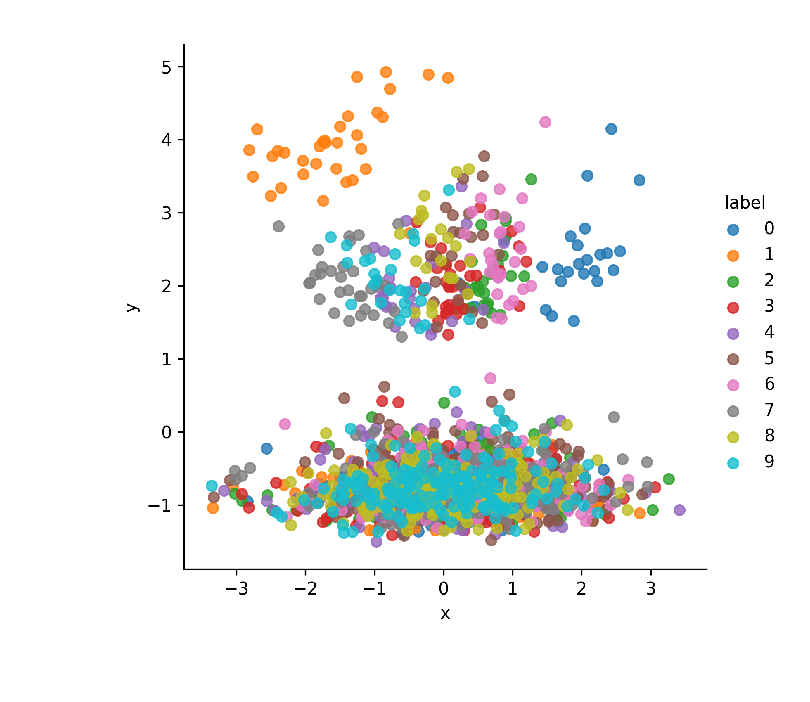

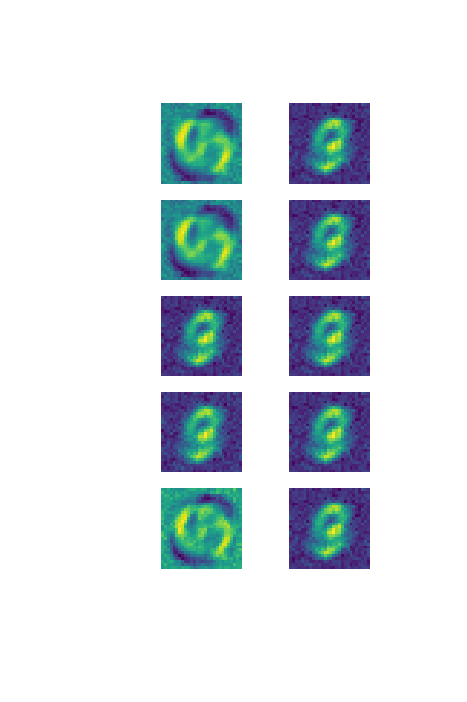

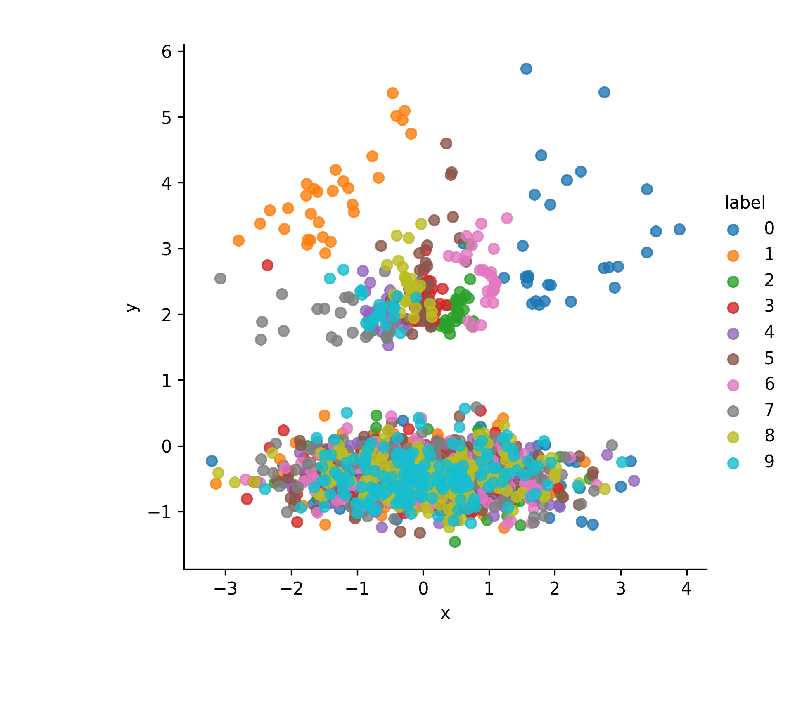

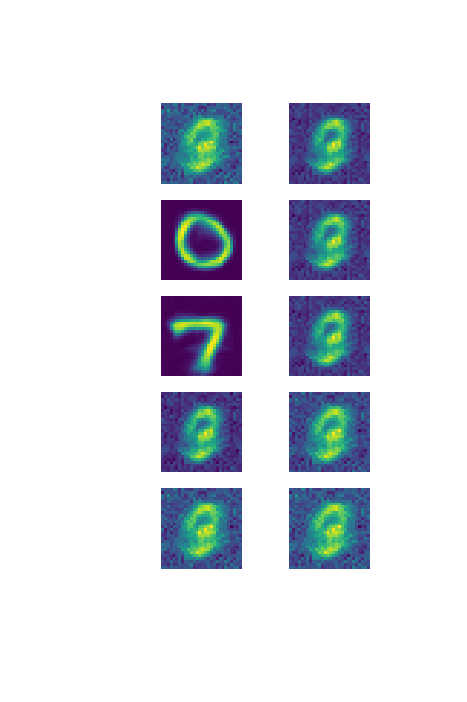

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for level in [0.2, 0.5, 0.9]:
    for sigma in [5, 20]:
        print(level, sigma)
        for index in [0, 4, 9]:
            try:            
                plt.rcParams['figure.dpi'] = 200
                img=mpimg.imread('figs/noise_%.2f_sigma_%.1f_n_2/E%d-Dist.png'%(level, sigma, index))
                imgplot = plt.imshow(img)
                plt.axis('off')               
                plt.show()
                img=mpimg.imread('figs/noise_%.2f_sigma_%.1f_n_2/E%dI937.png'%(level, sigma, index))
                imgplot = plt.imshow(img)
                plt.axis('off')
                plt.show()
            except:
                pass

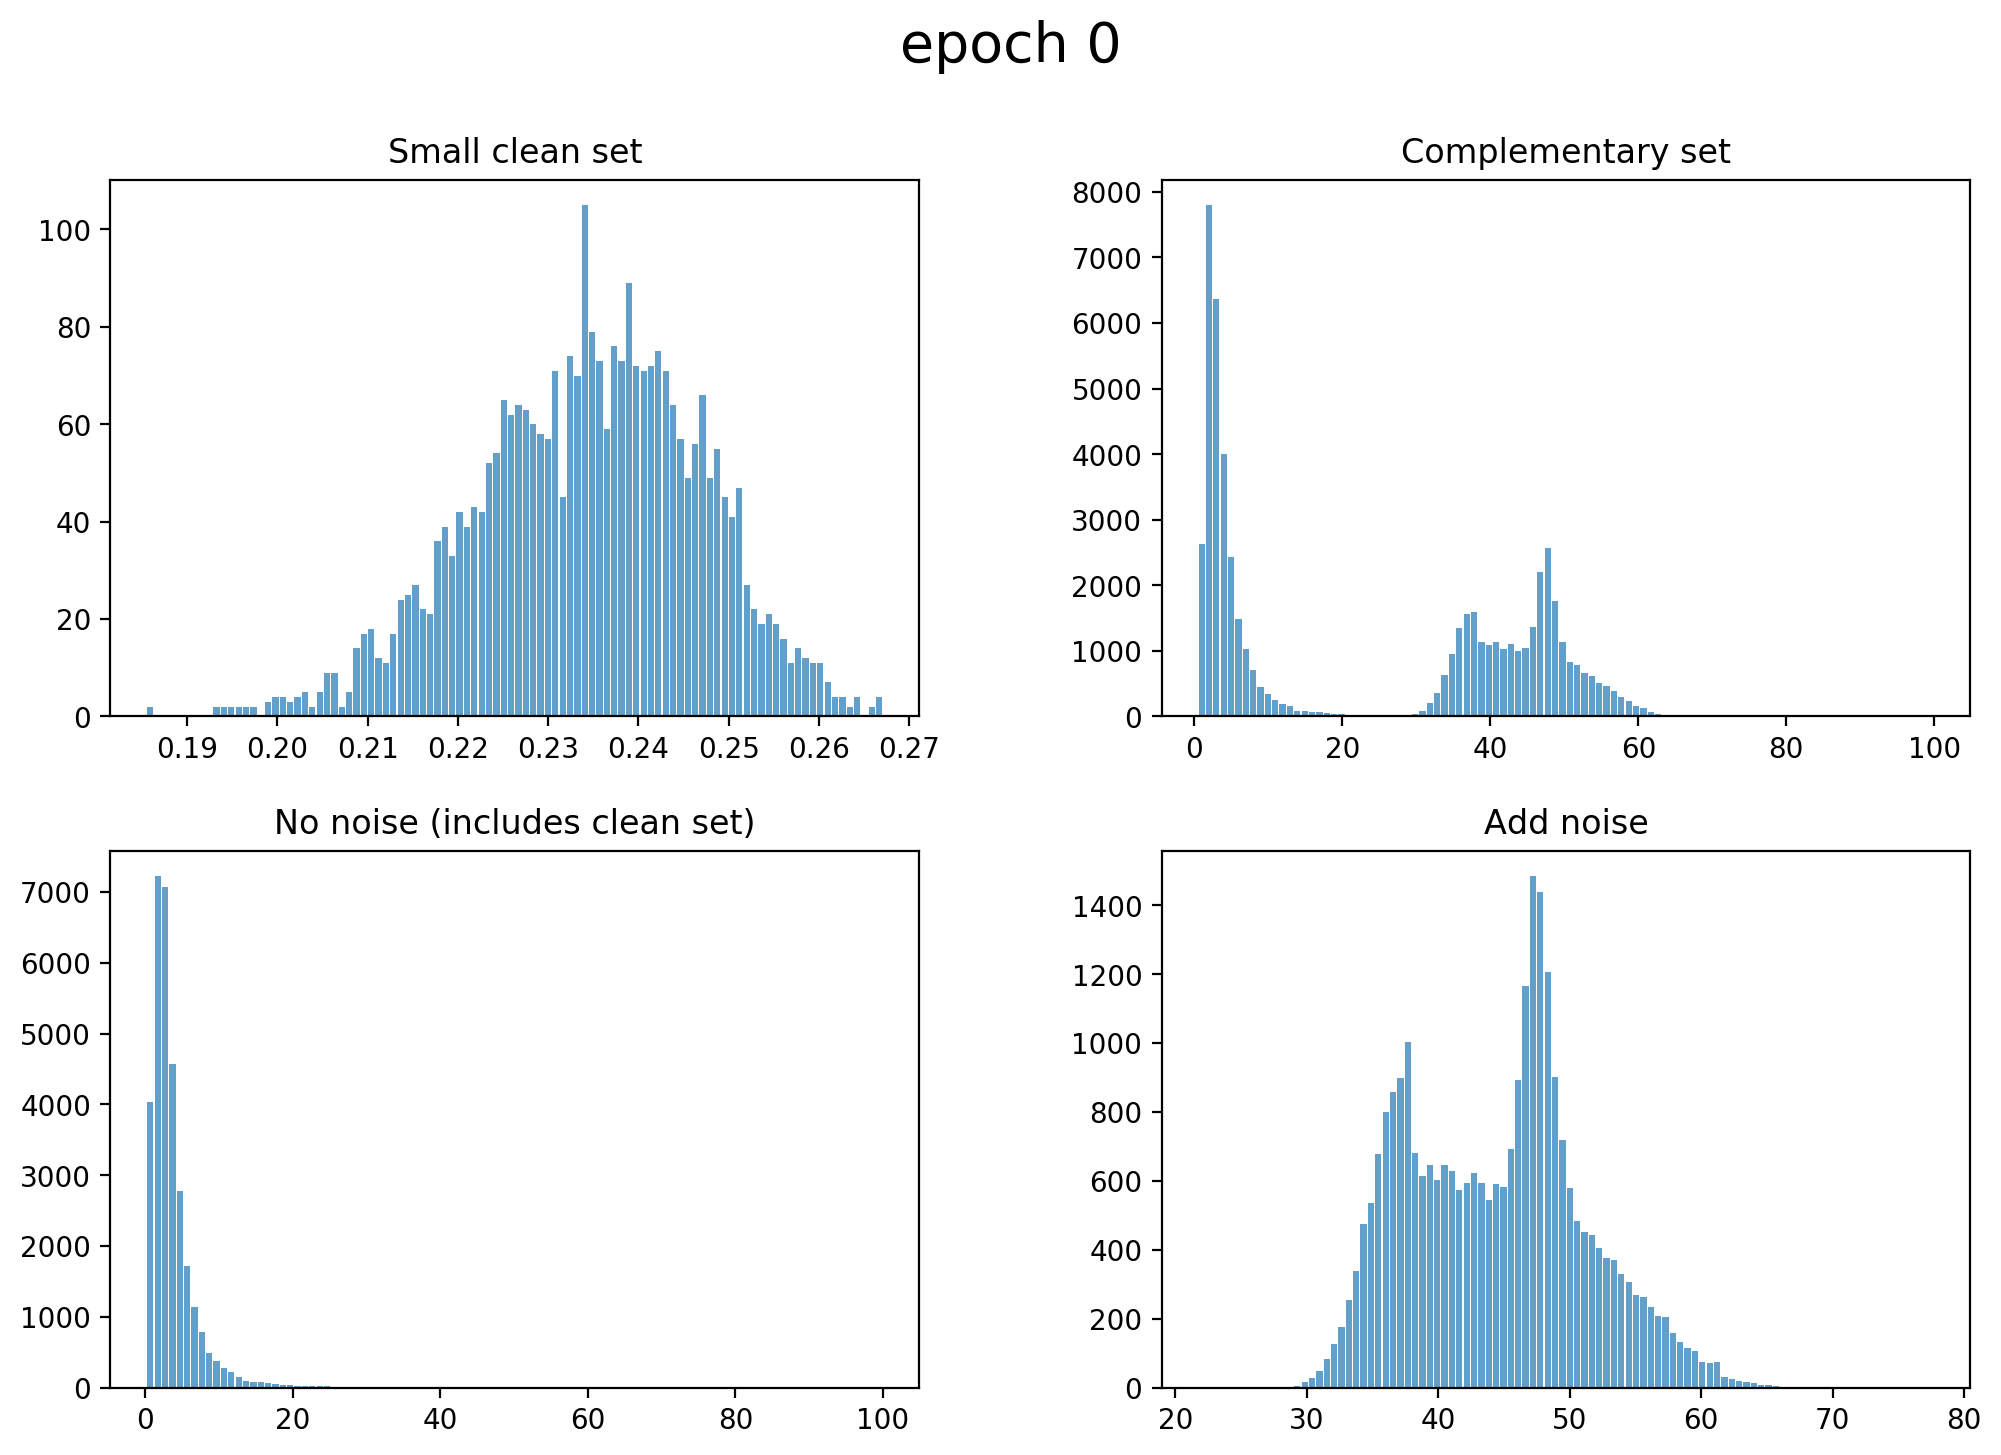

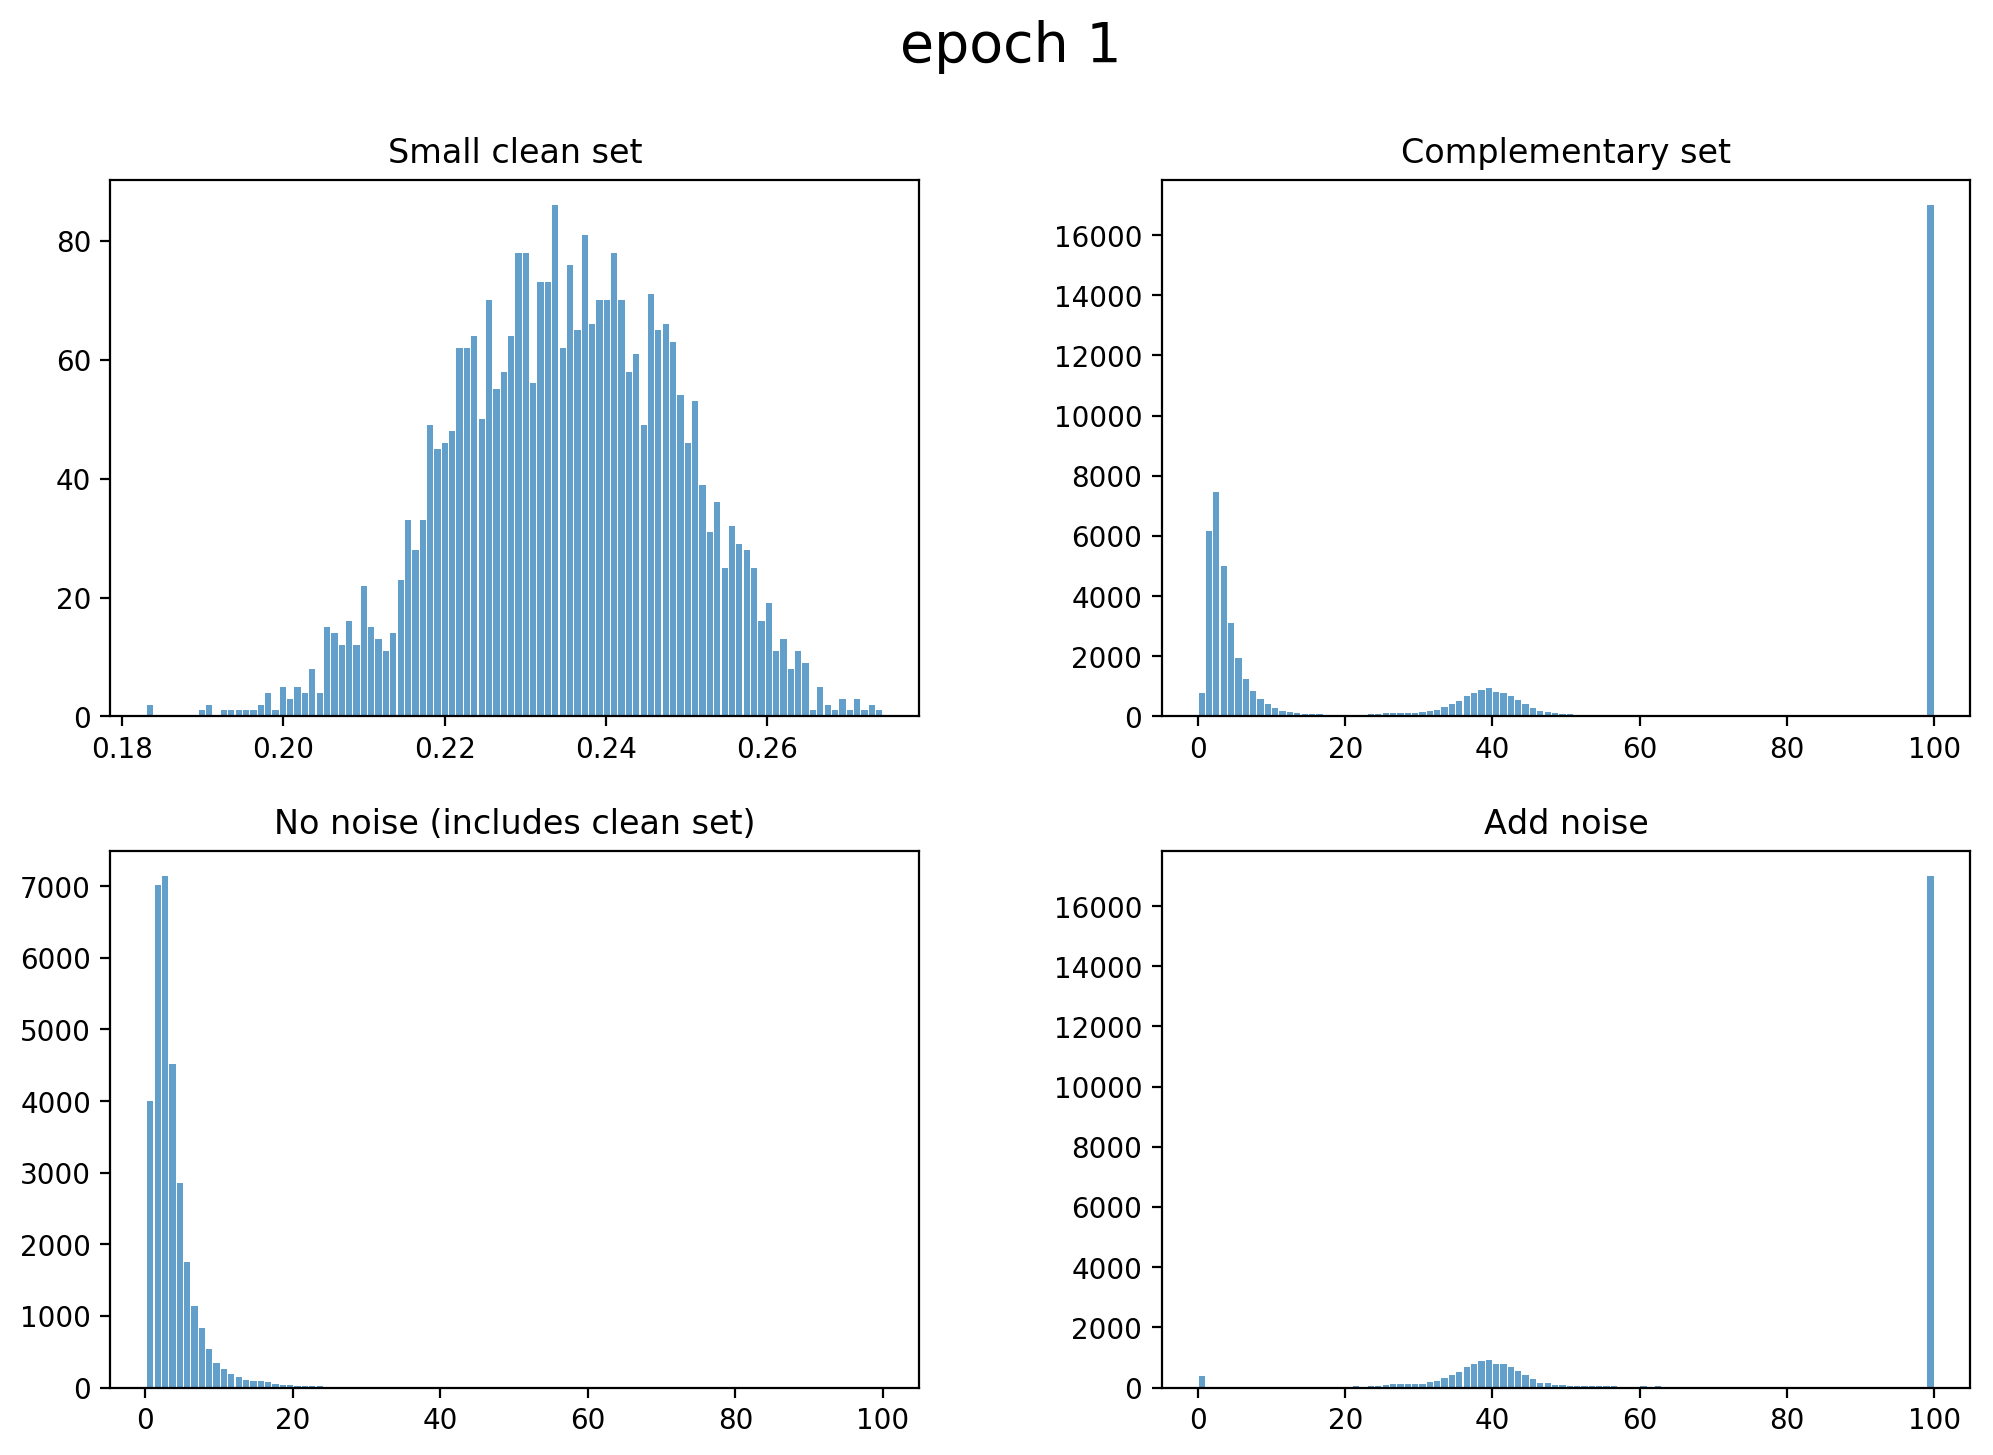

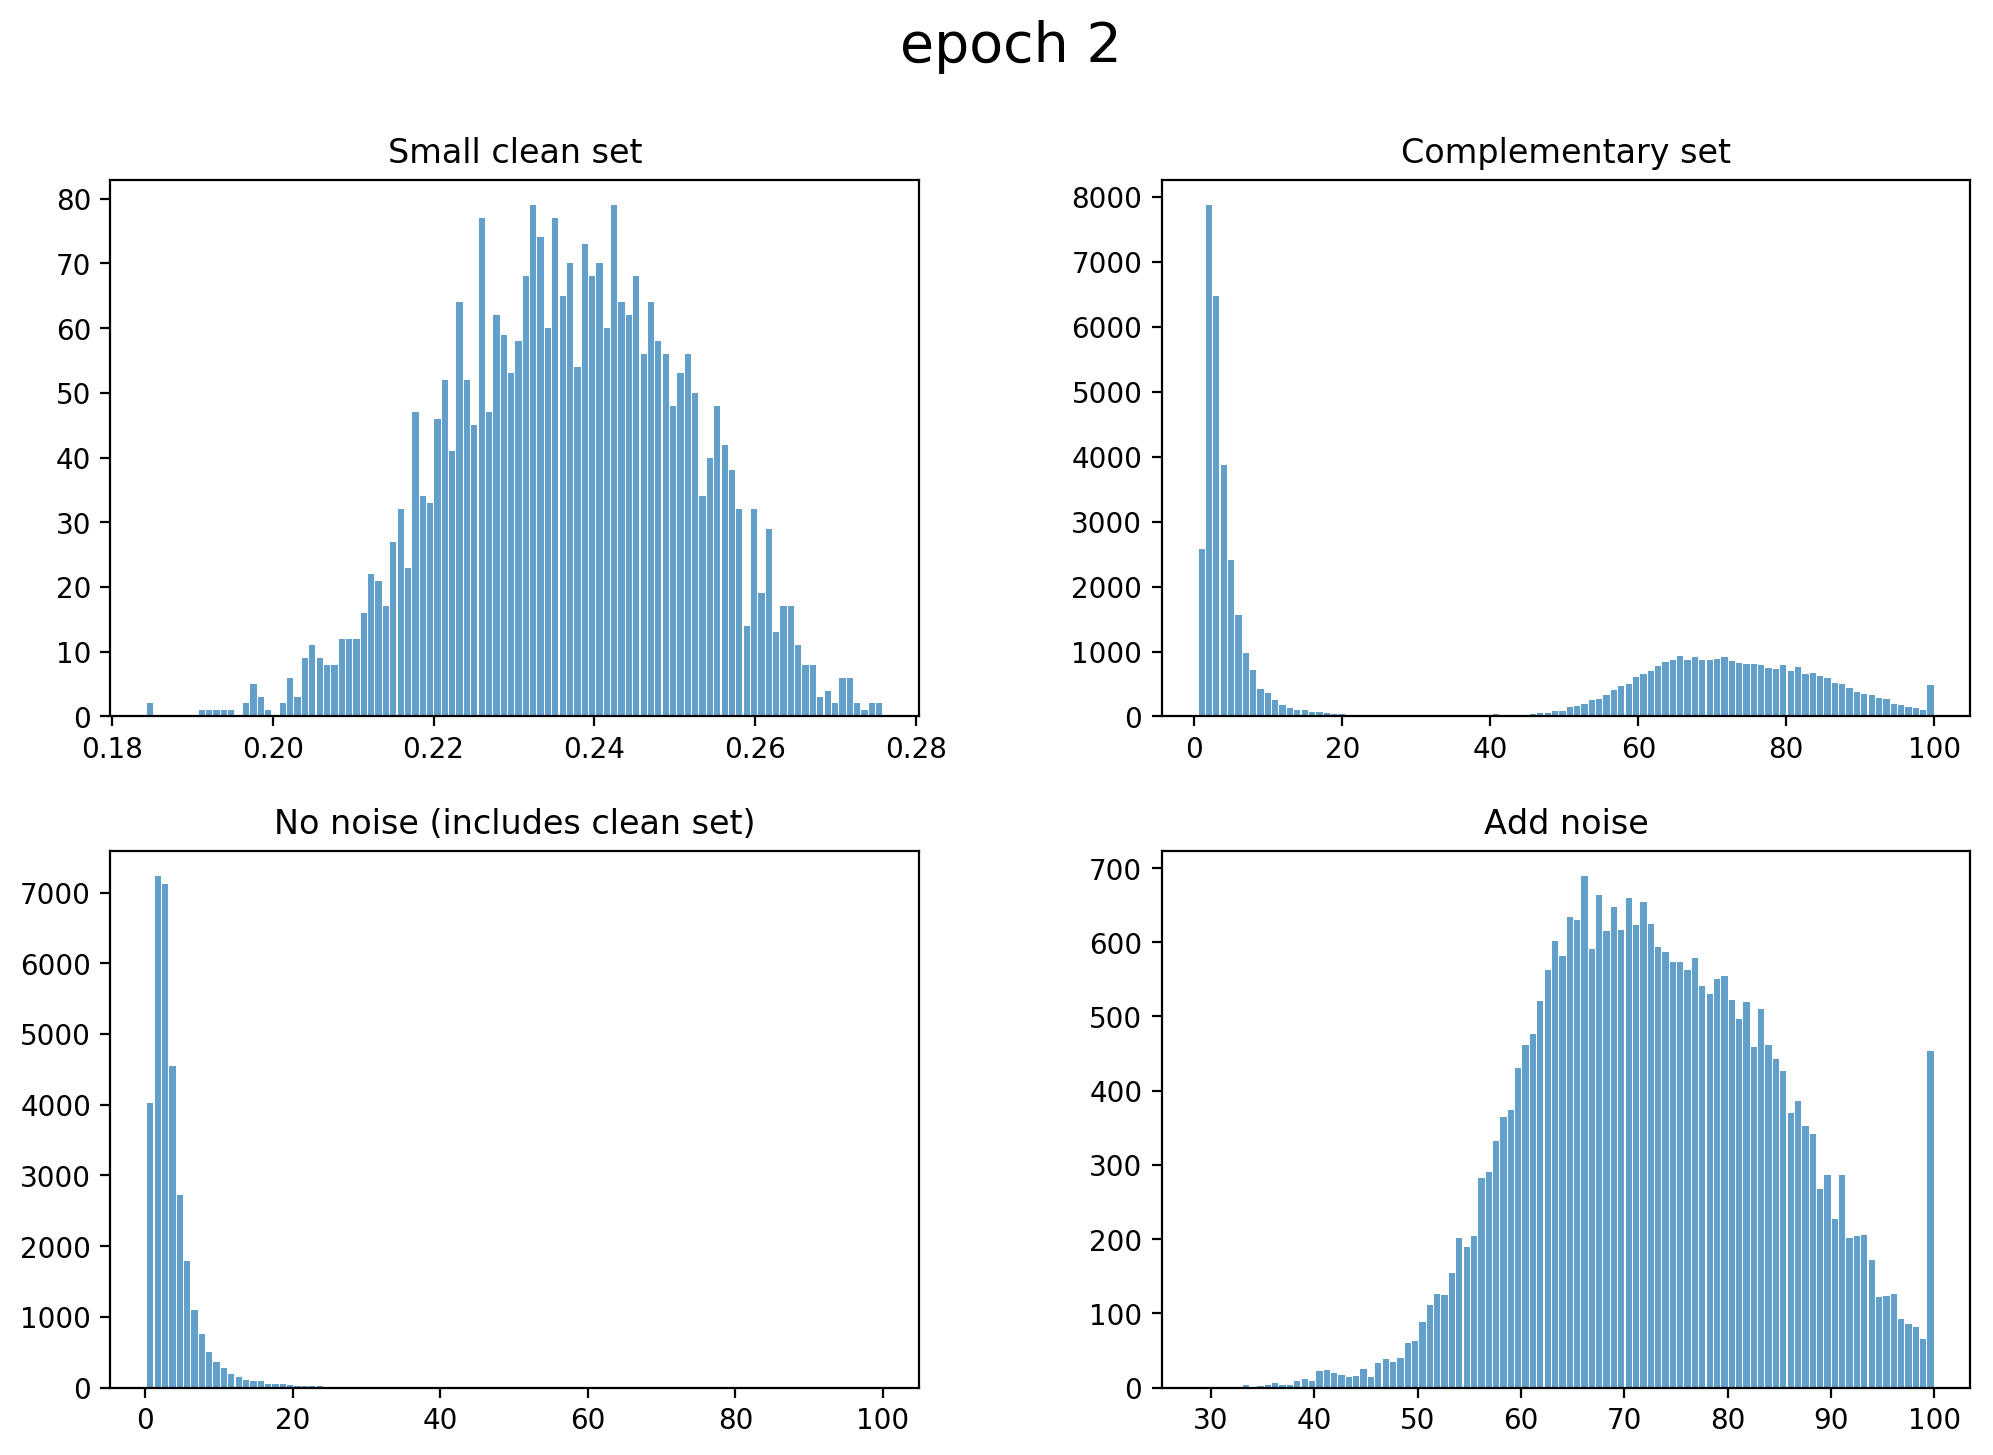

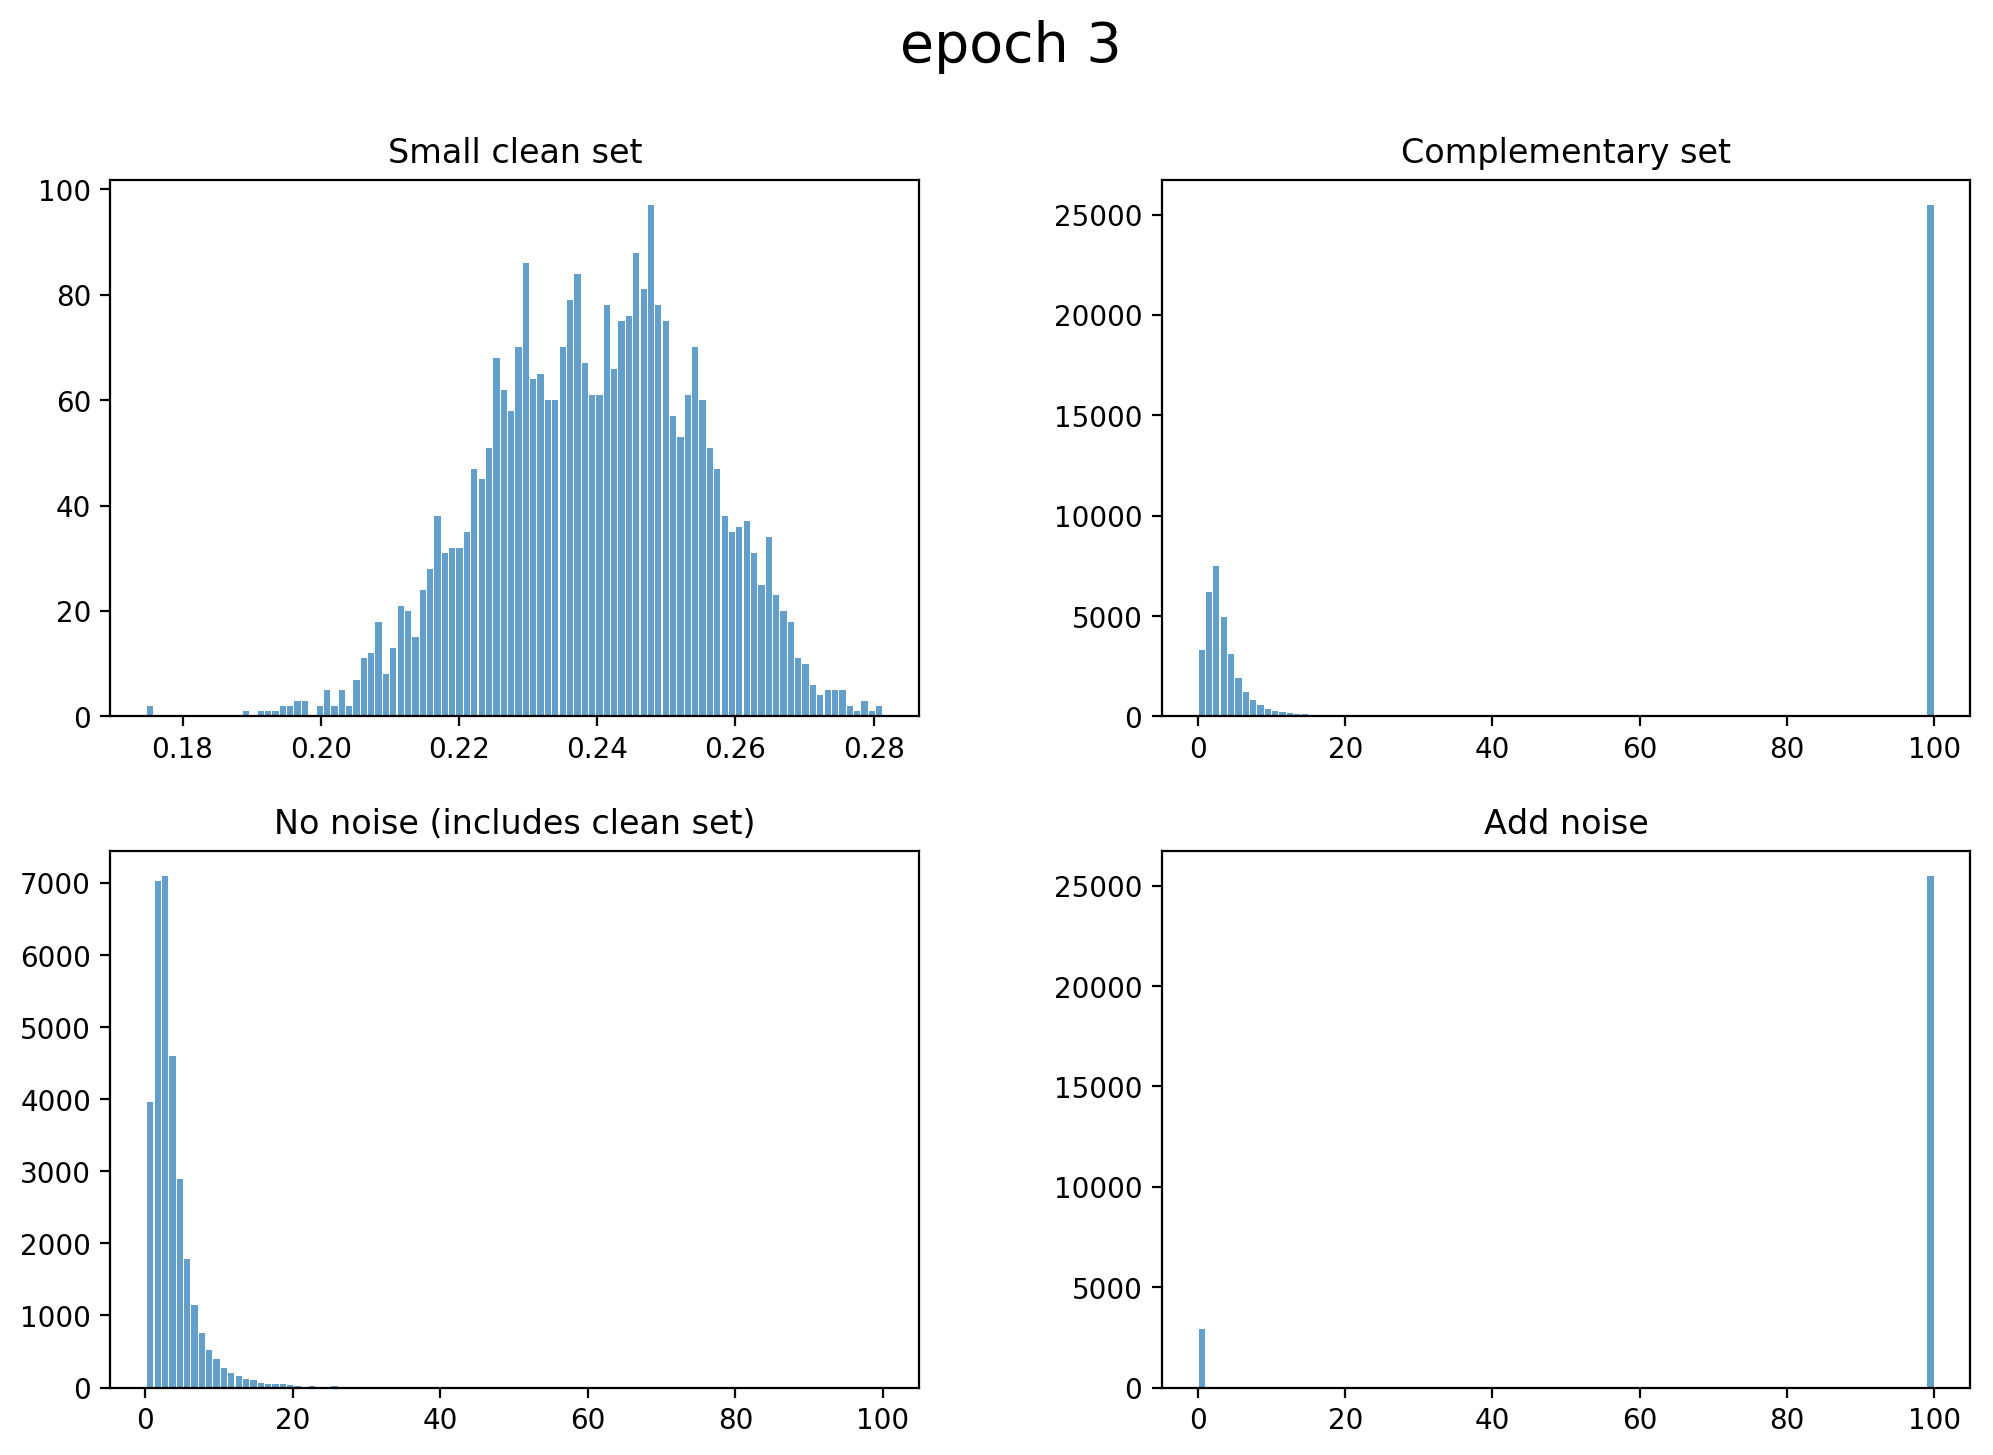

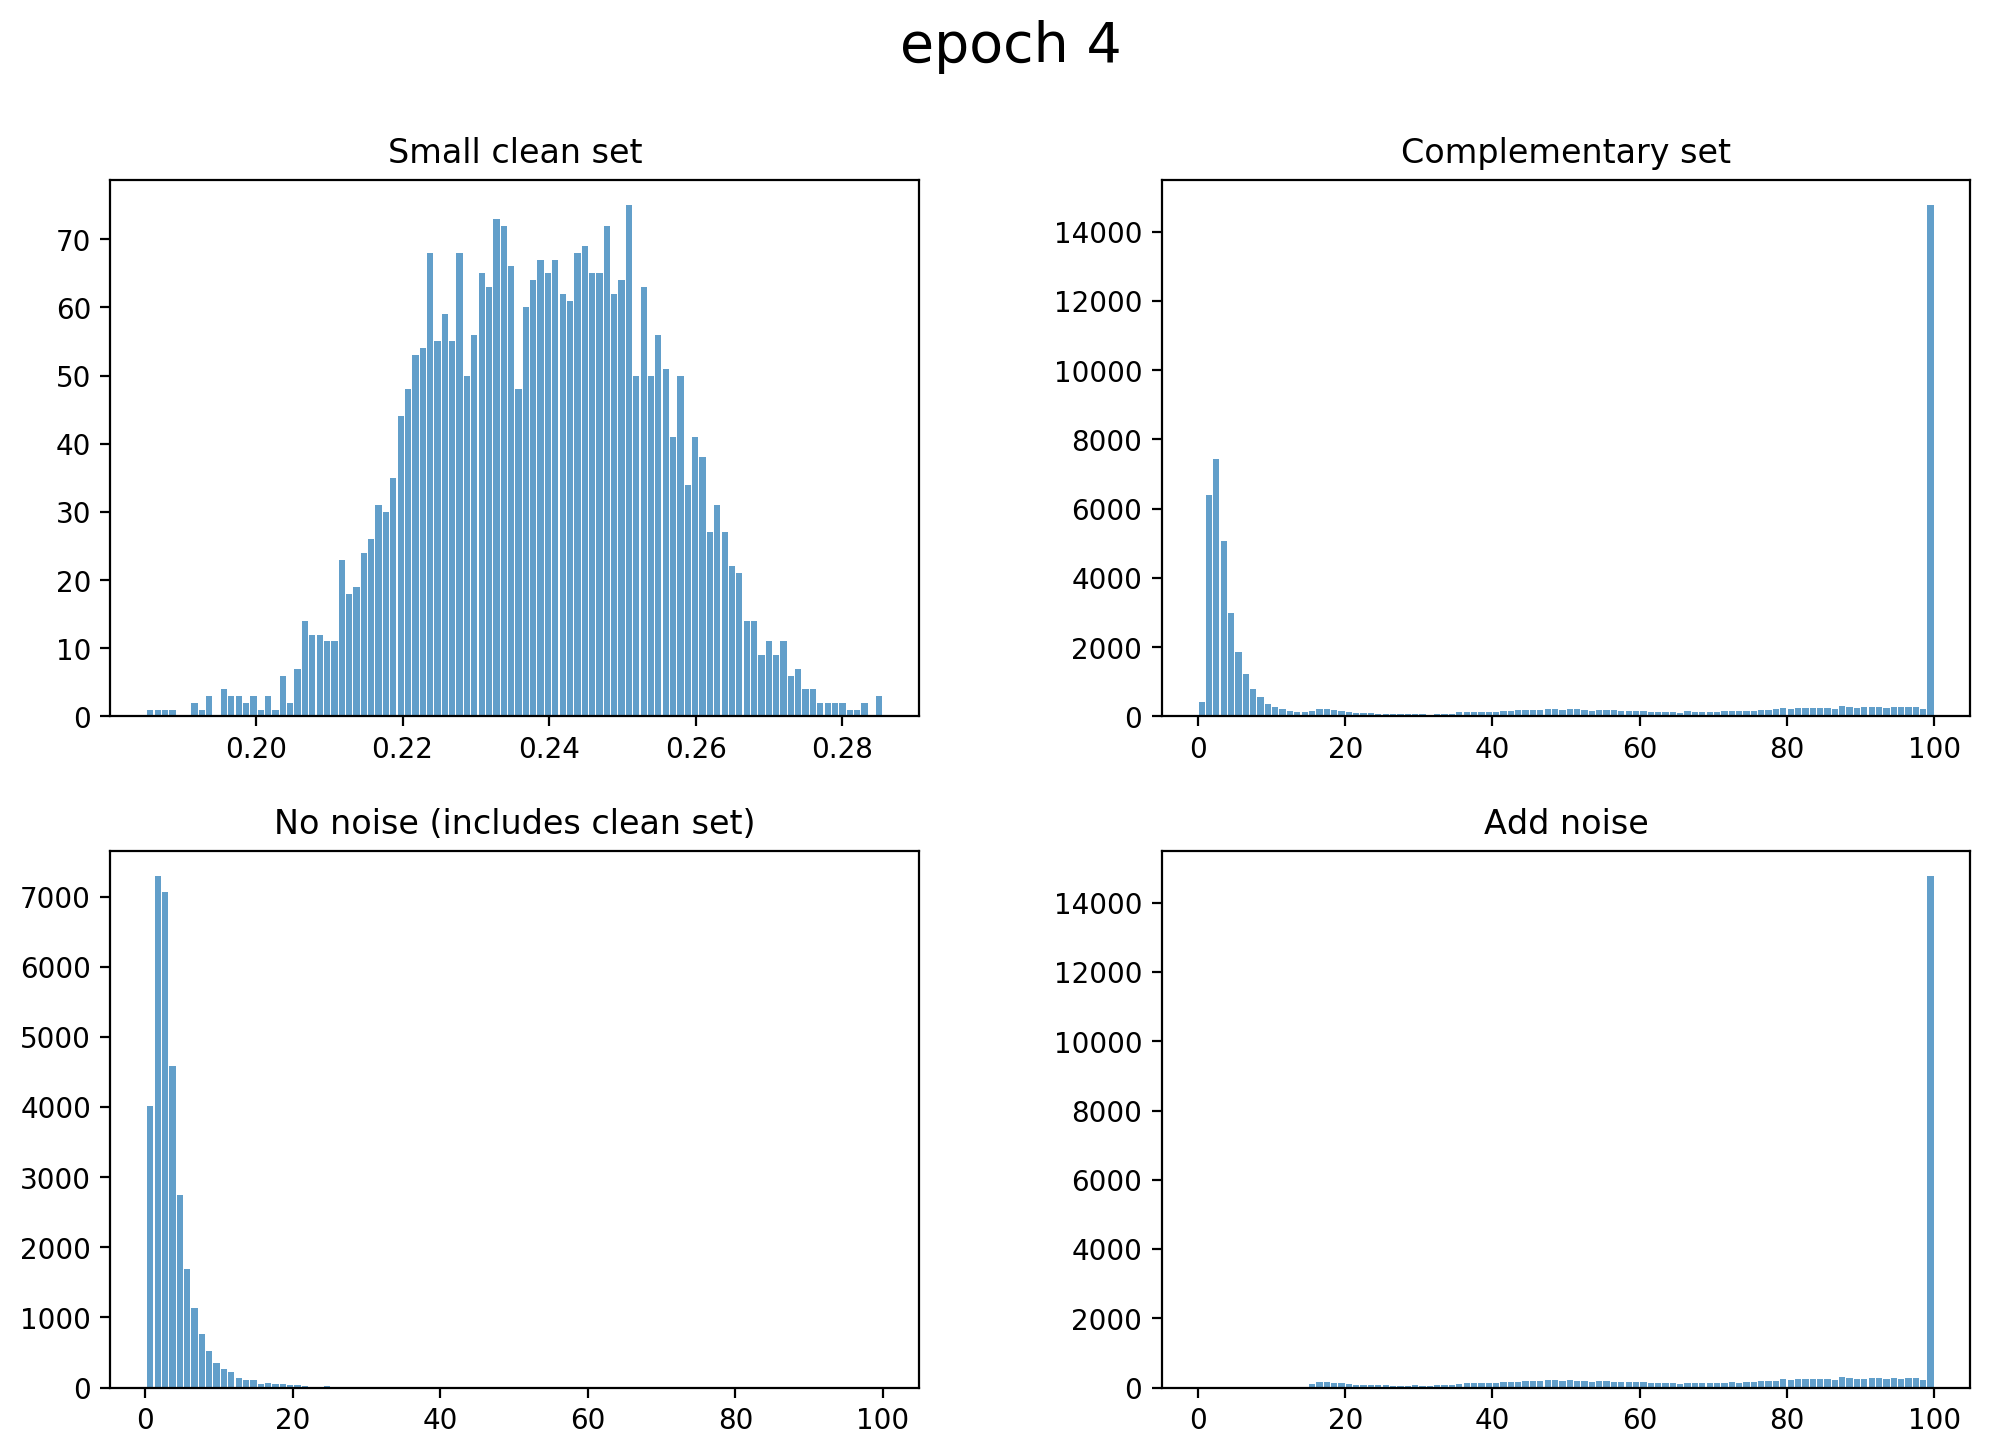

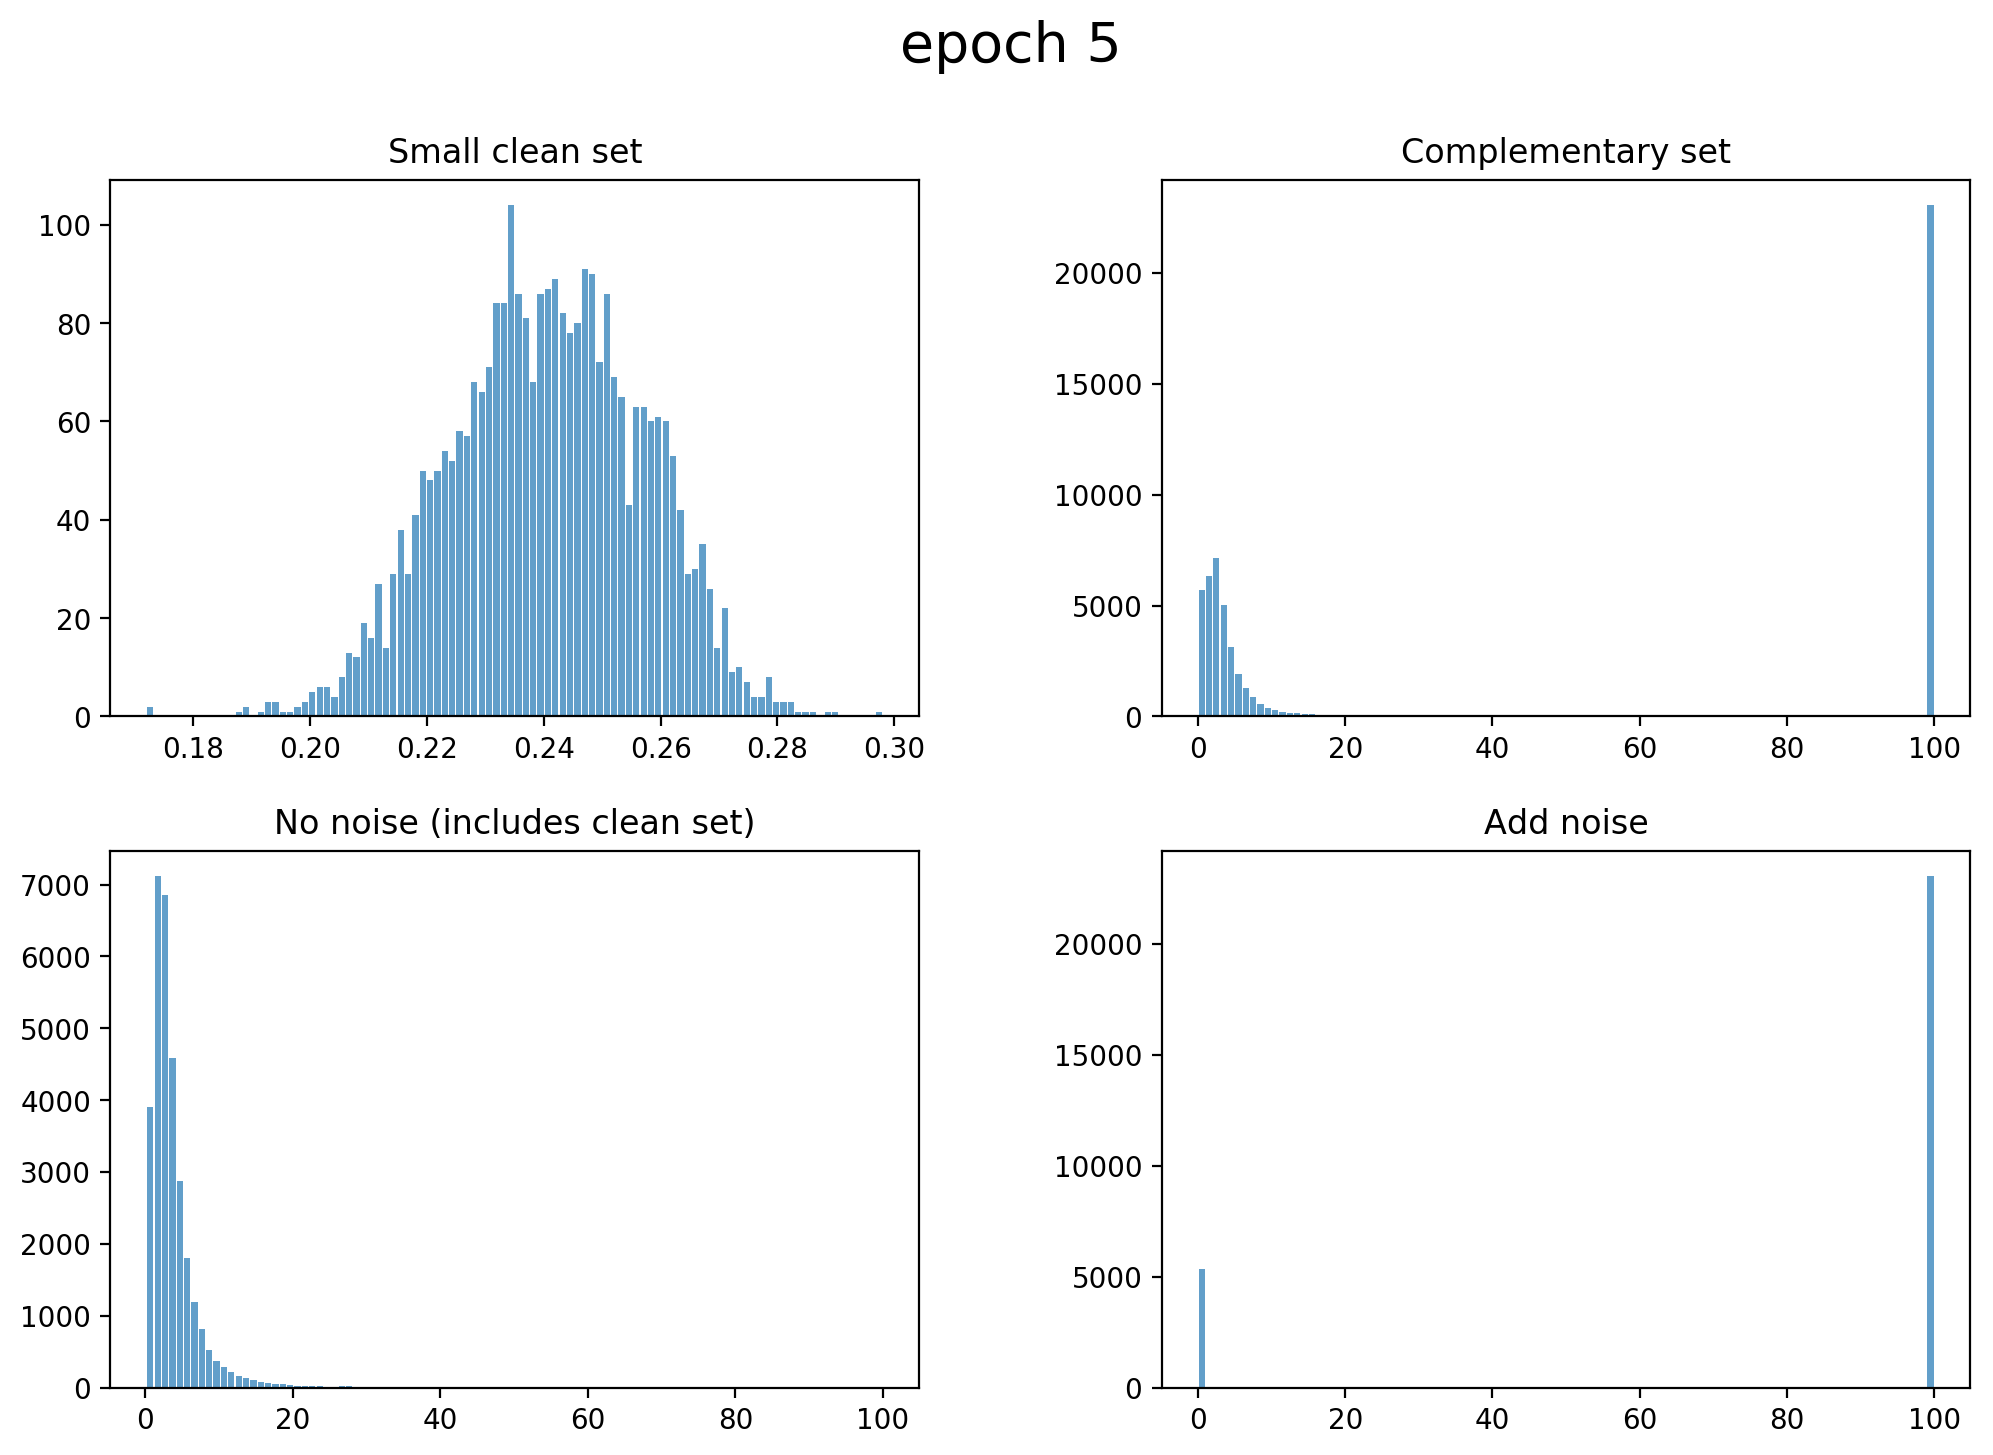

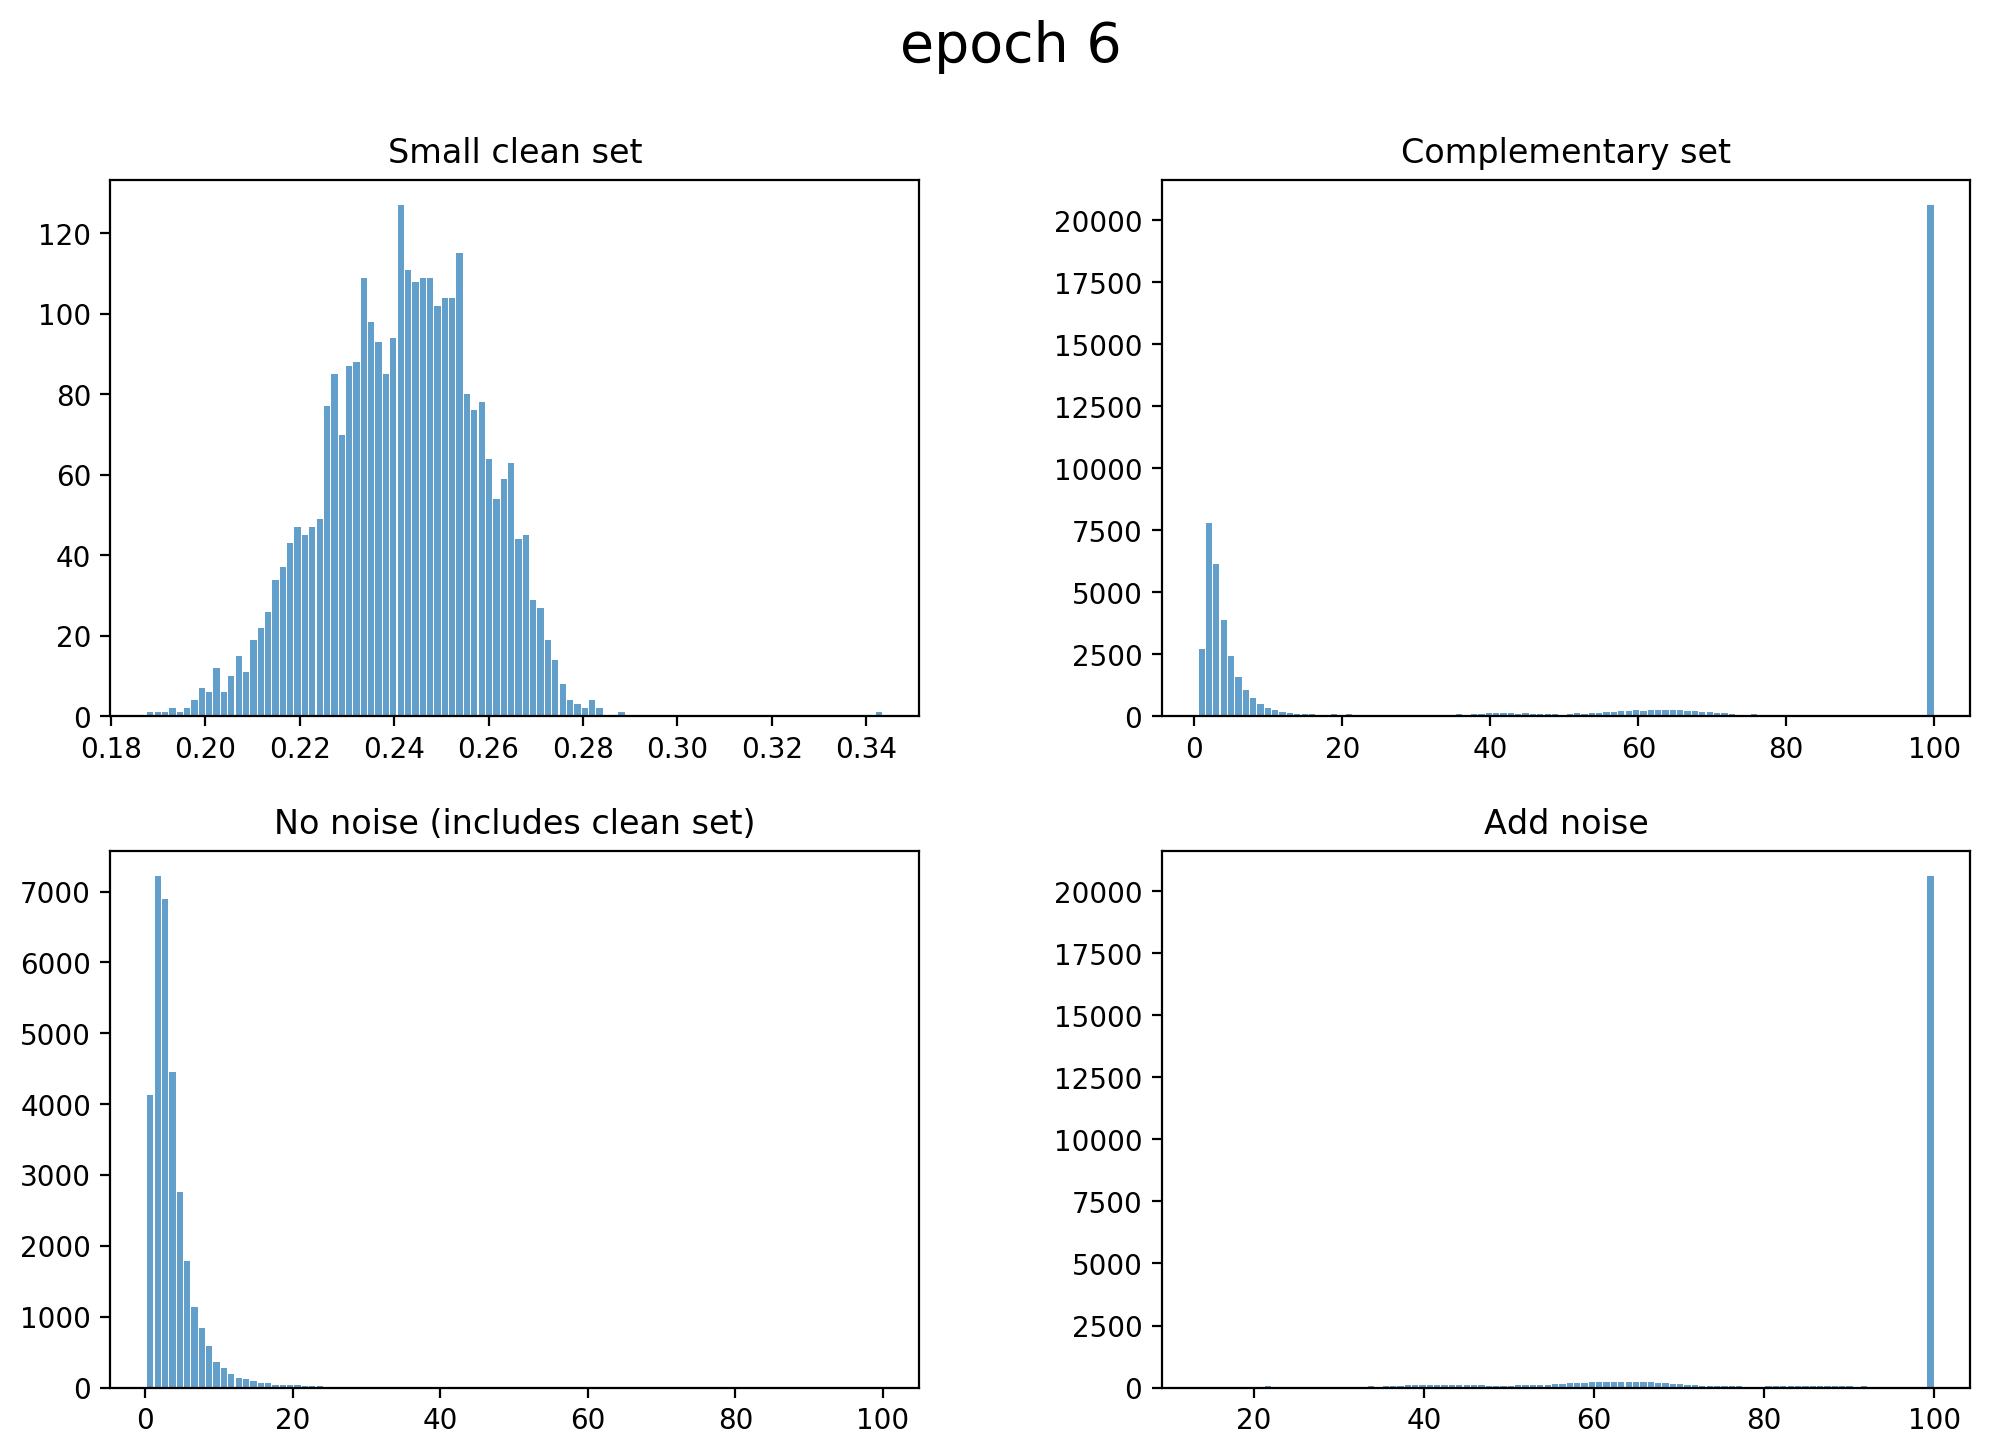

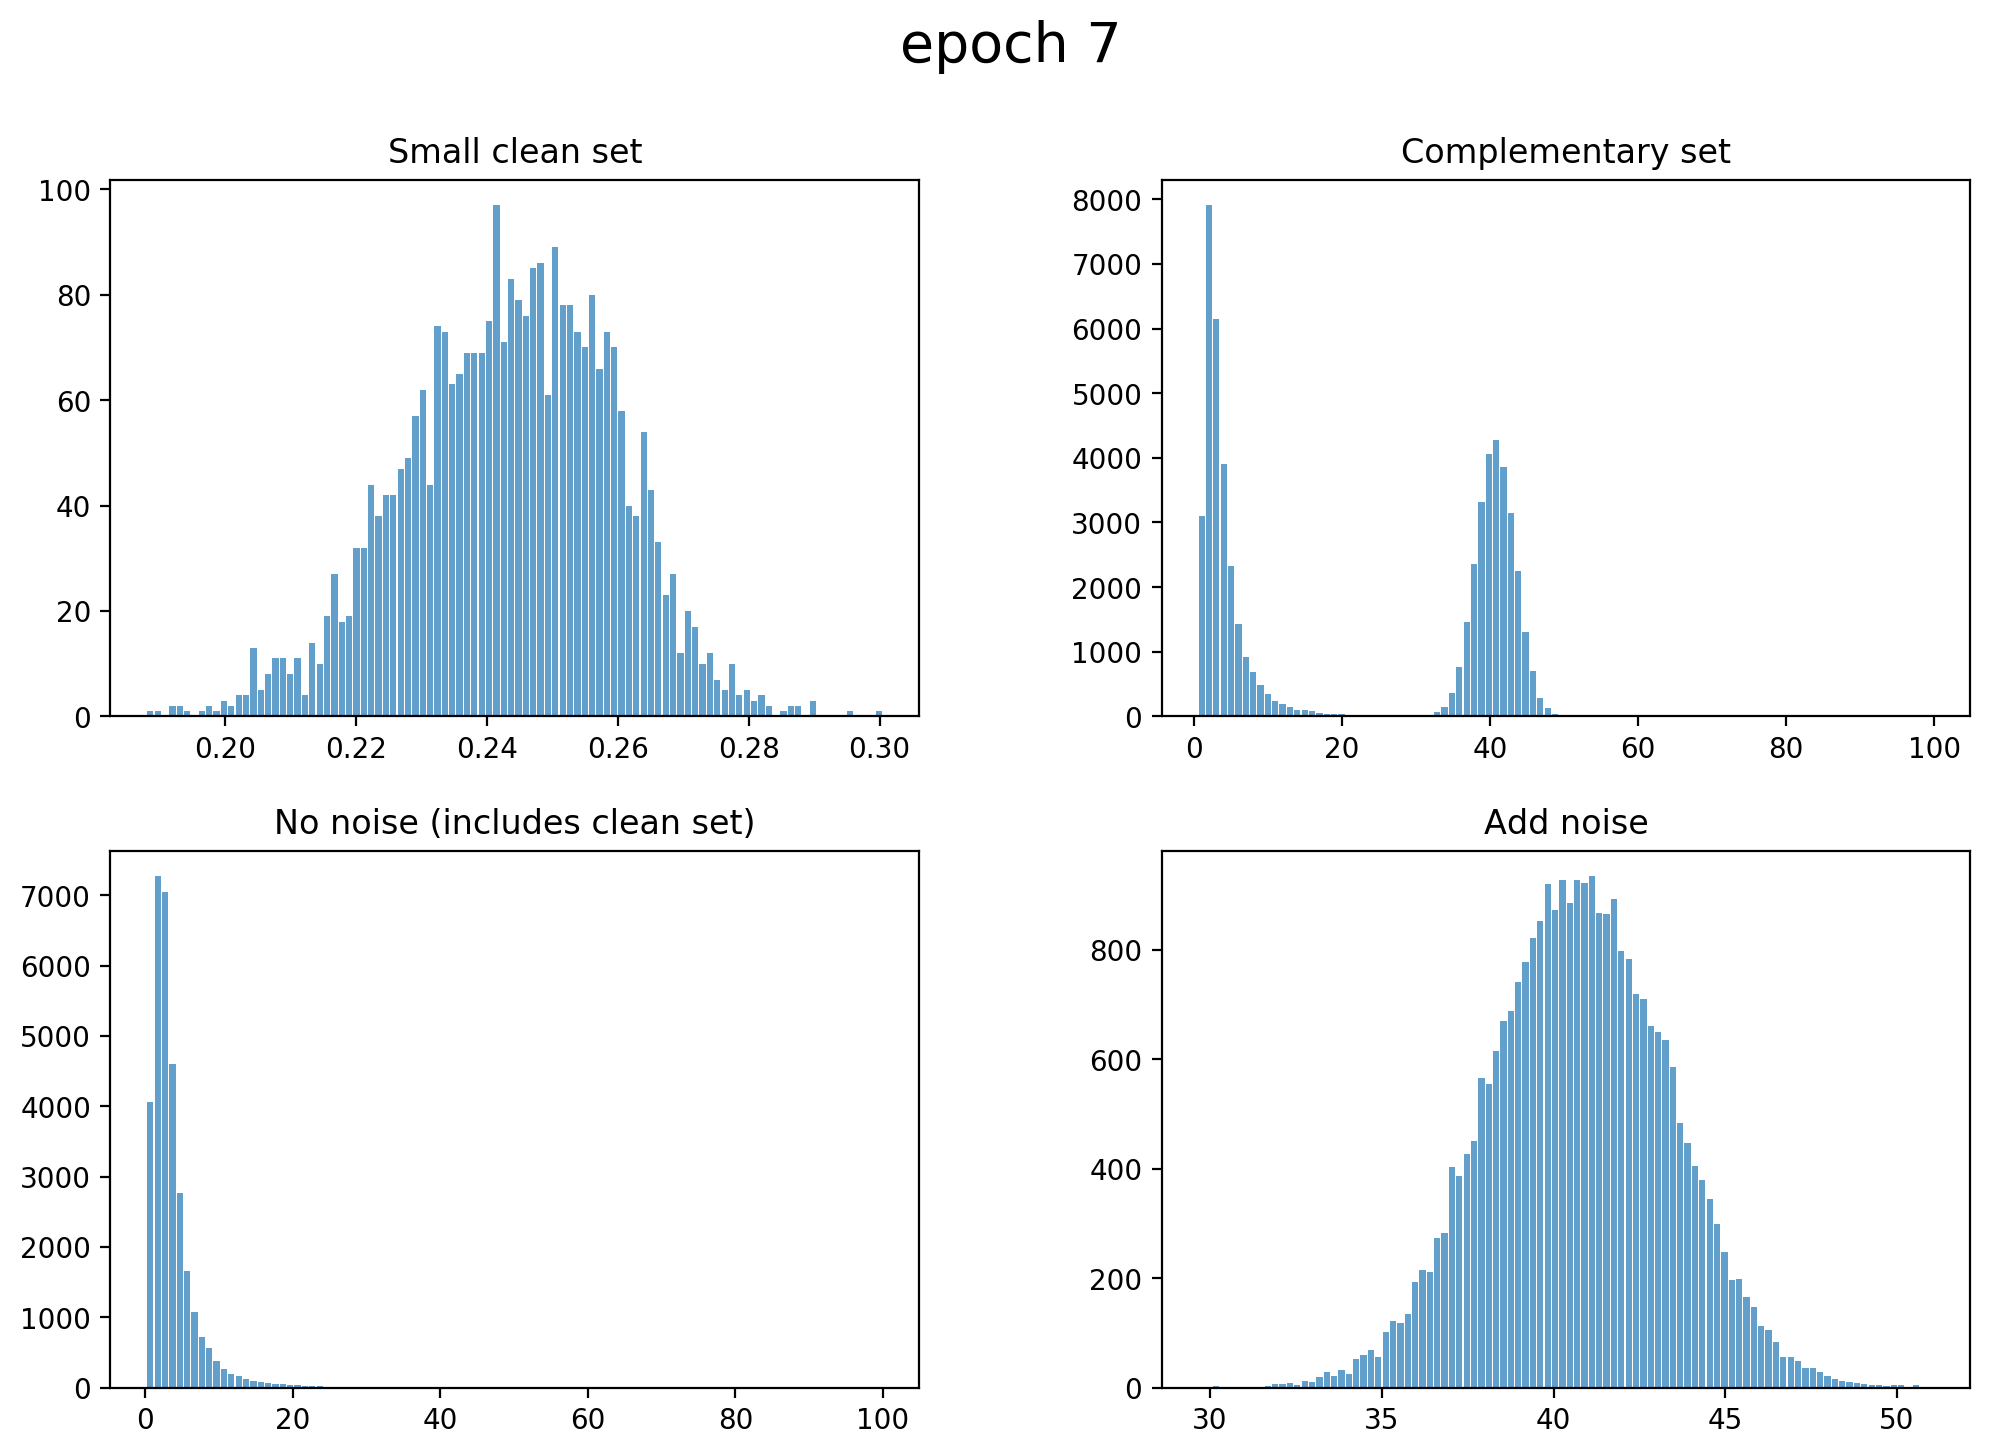

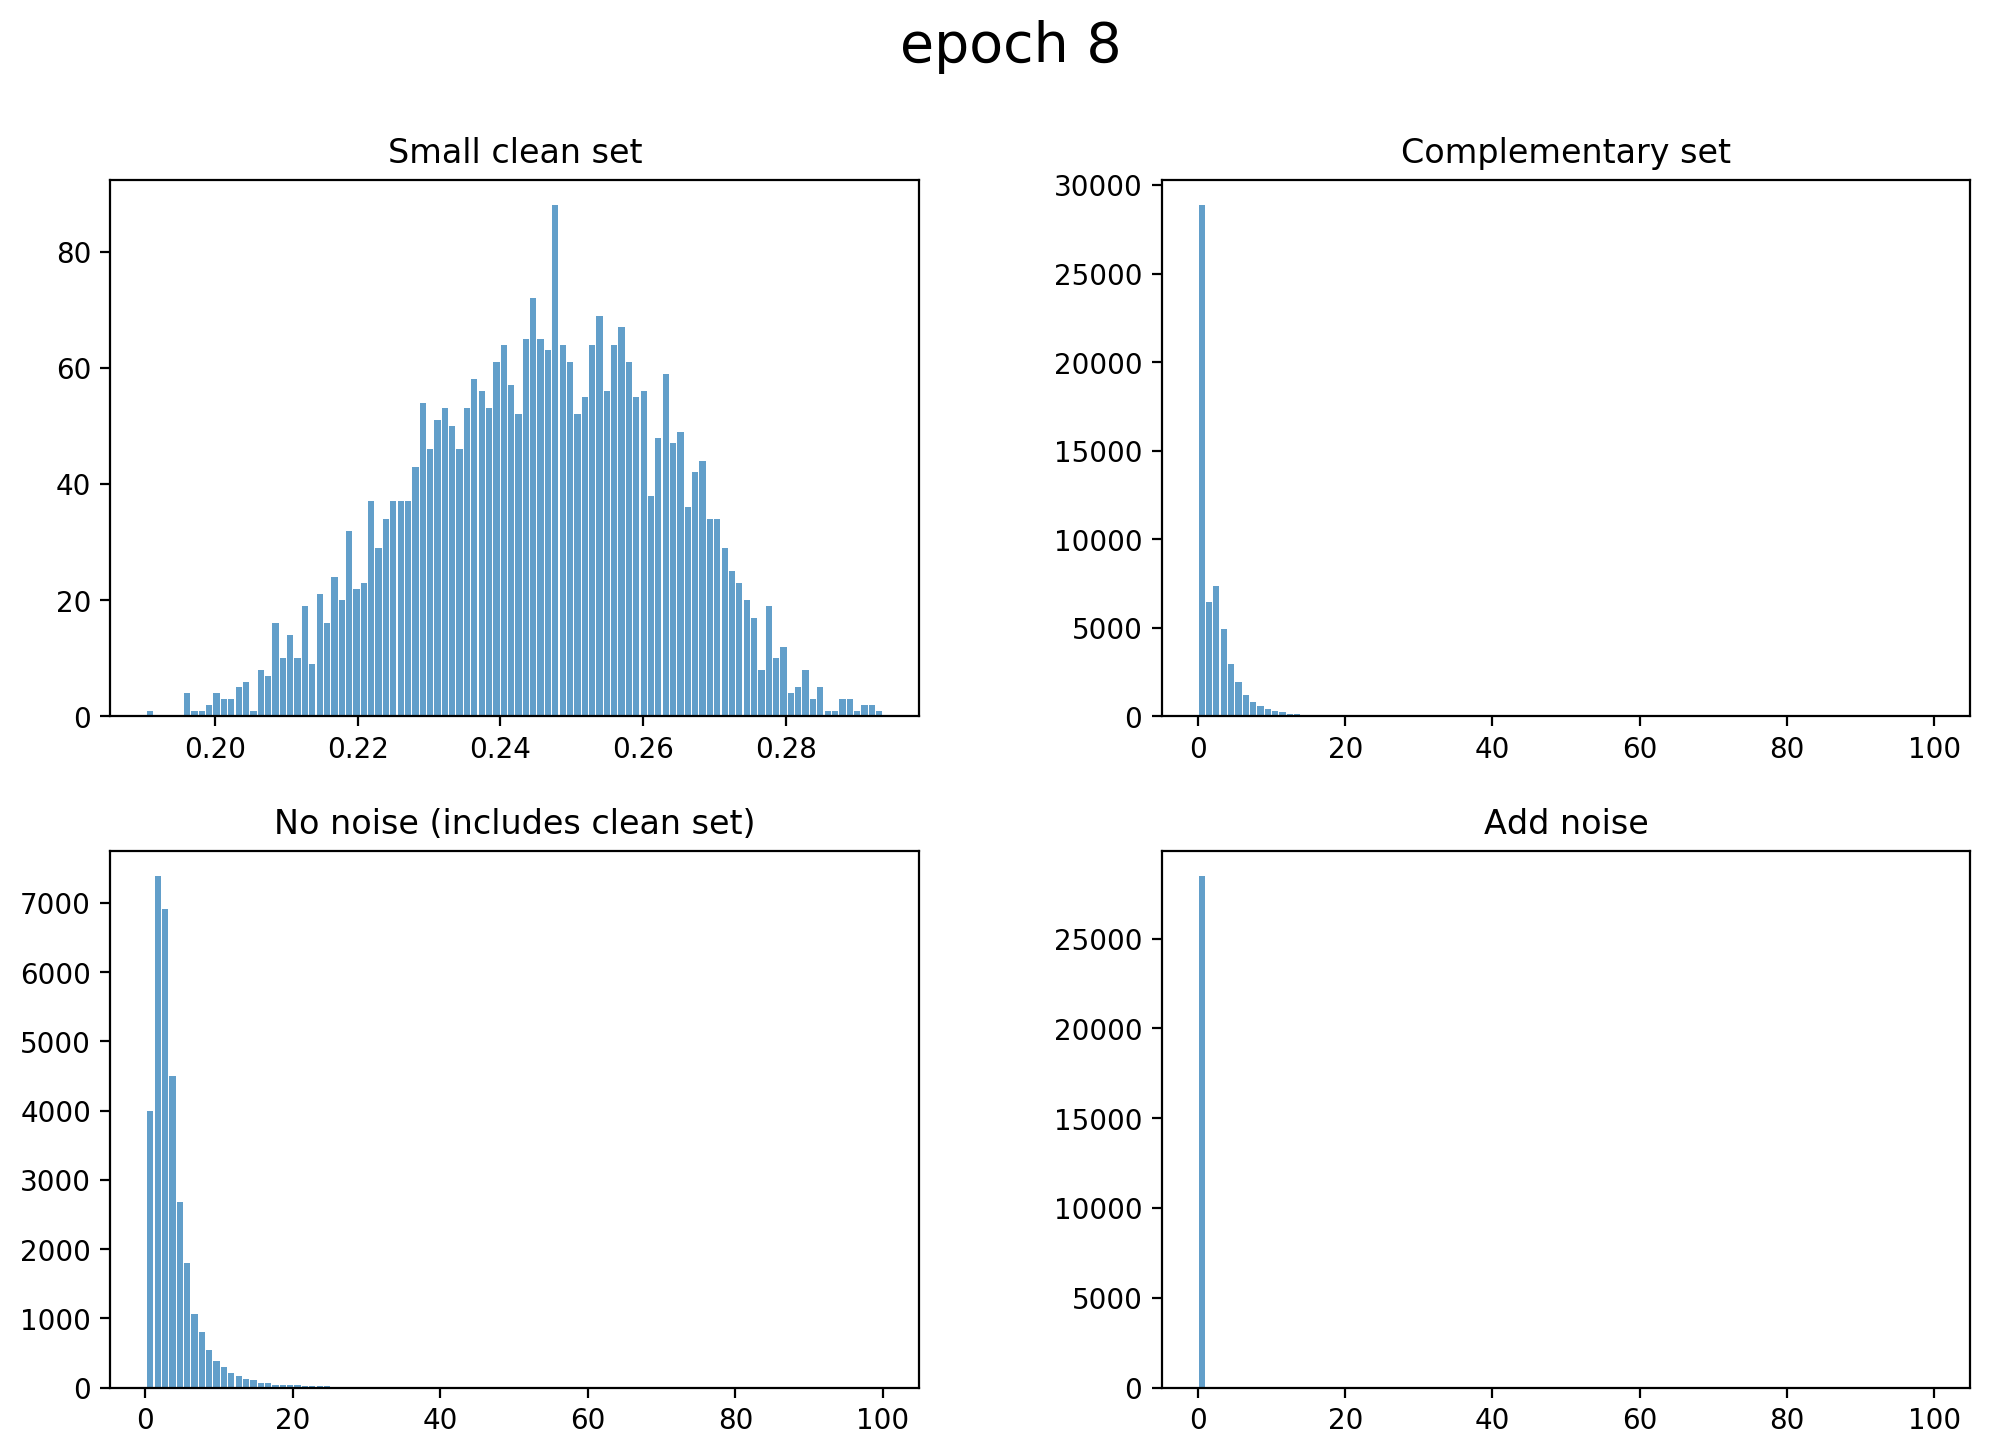

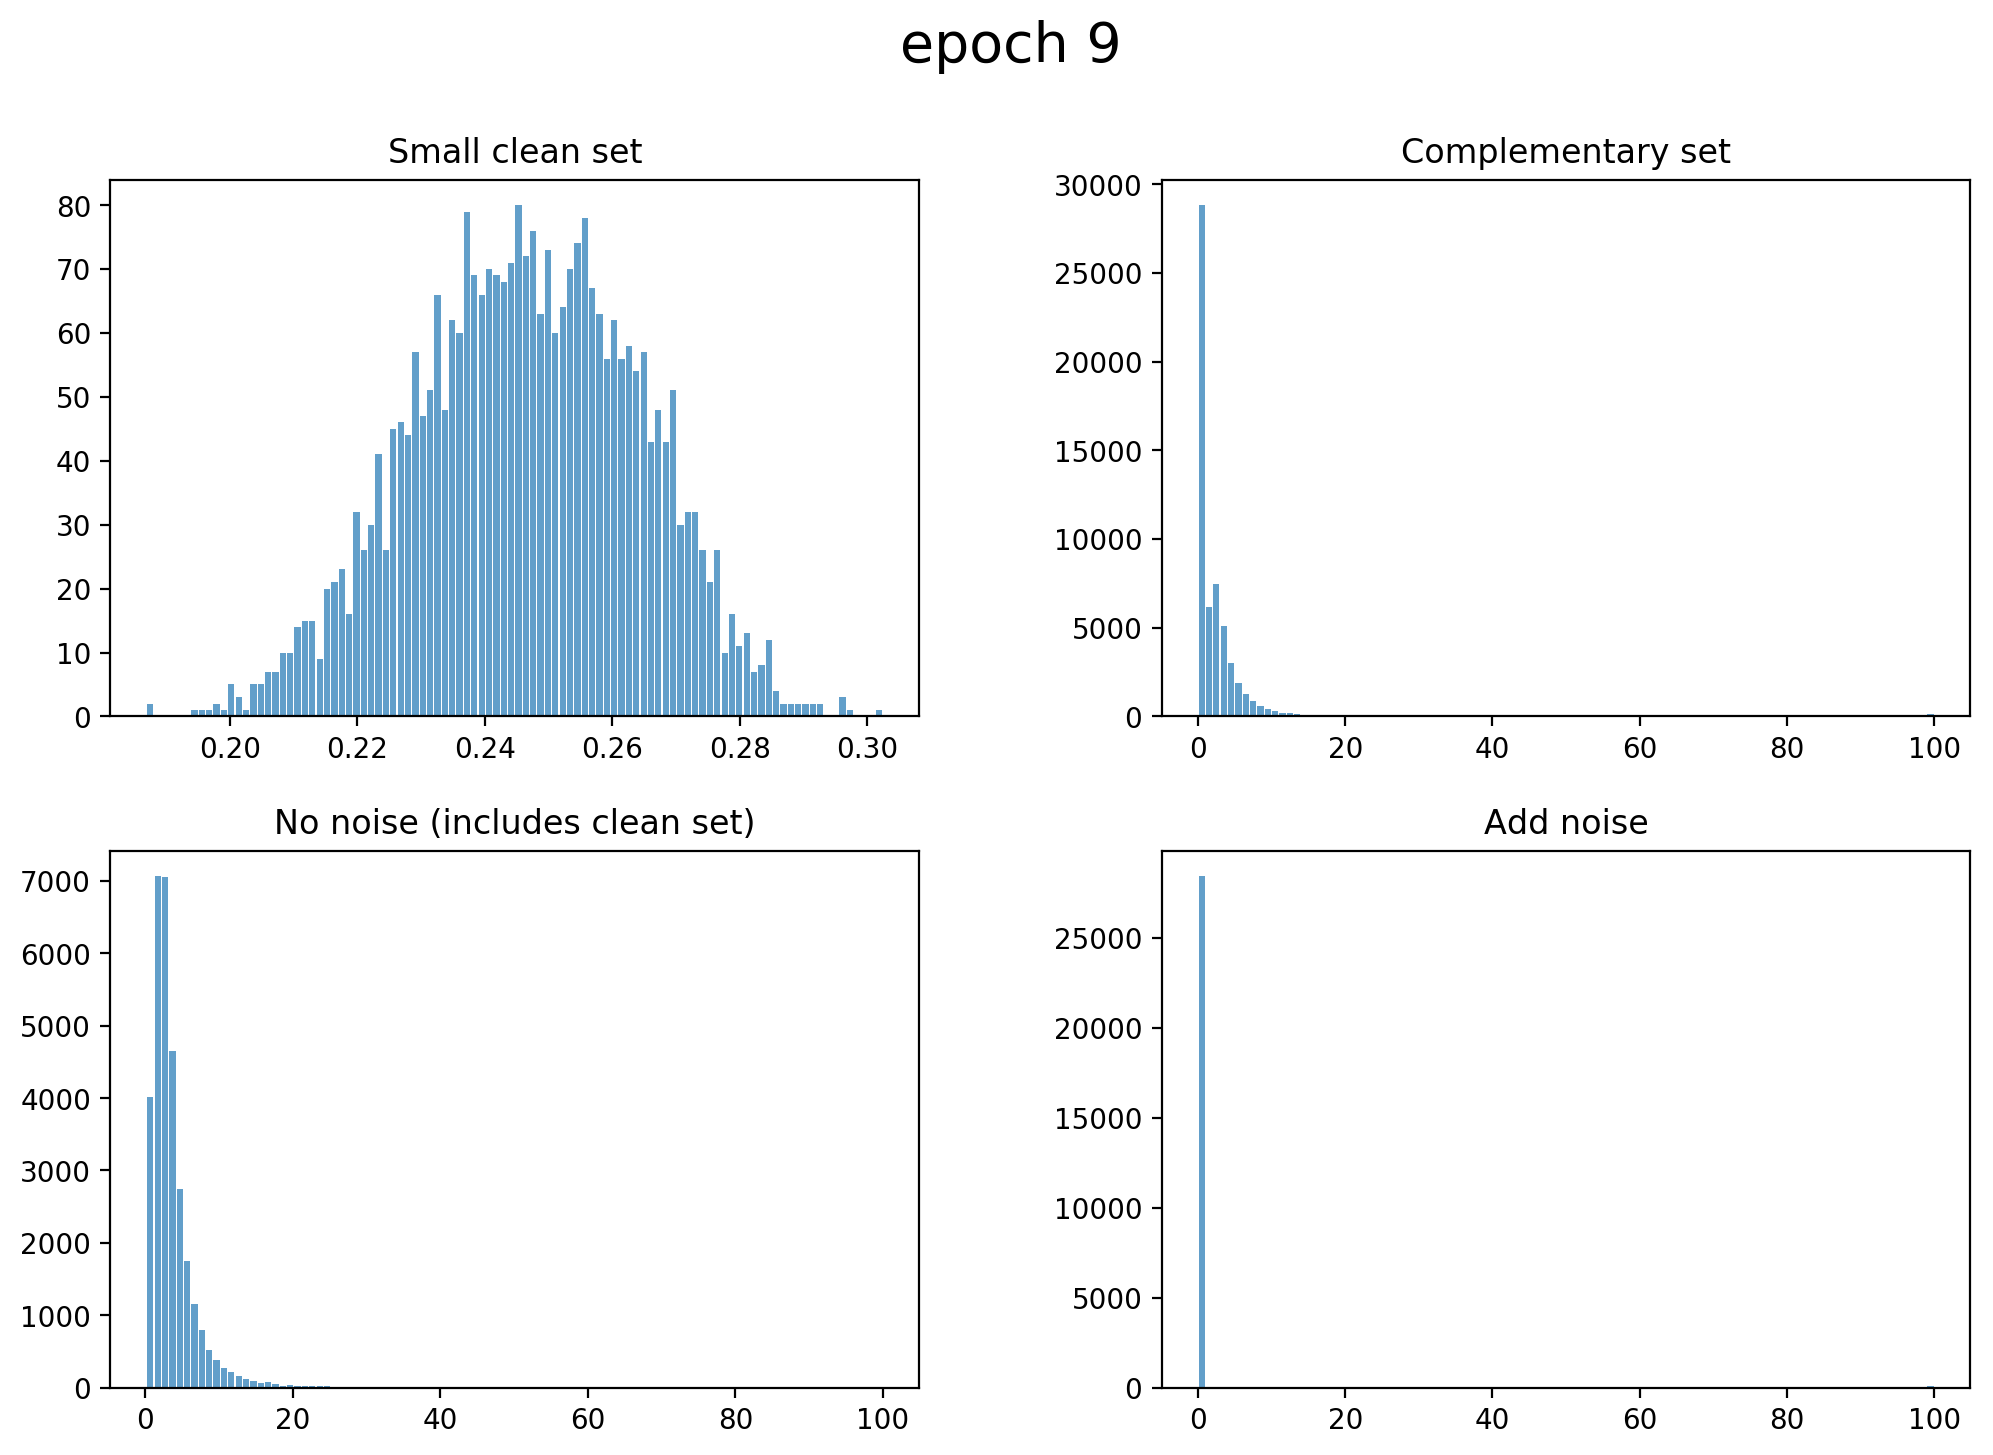

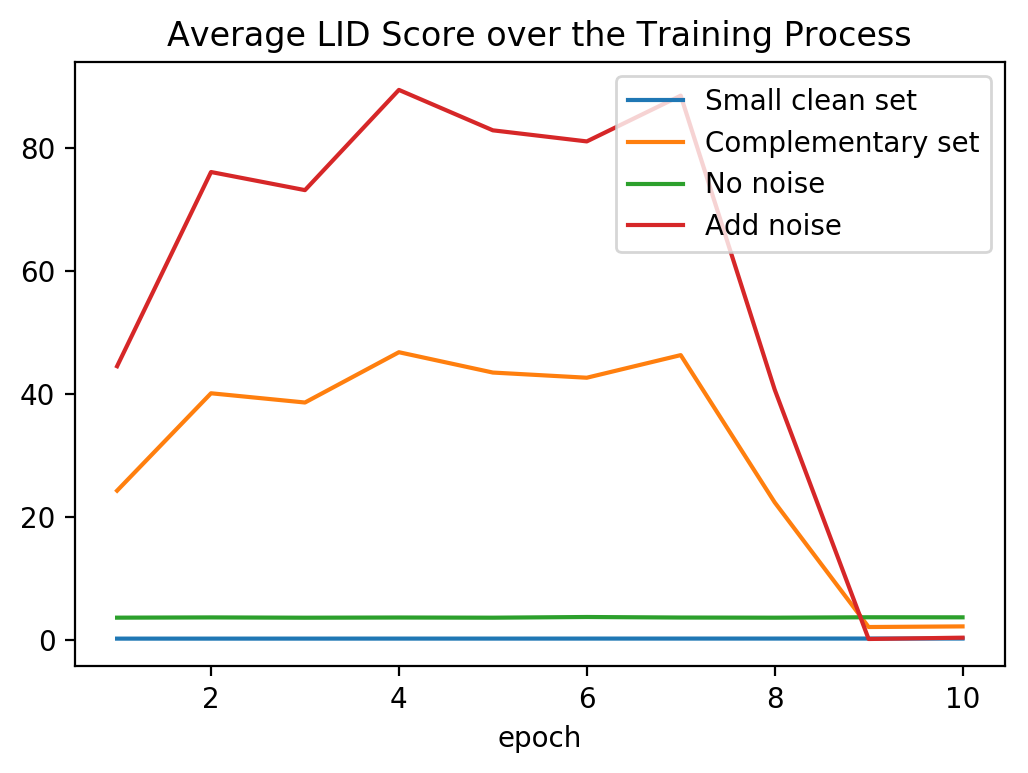

In [139]:
noise_level = 0.5
noise_sigma = 5
latent_size = 2
path = 'record/noise_%.2f_sigma_%.1f_n_%d'%(noise_level, noise_sigma, latent_size)

clean_process = []
noise_process = []
add_noise_process = []
no_noise_process = []

for epoch in range(10):
    data=pd.read_csv(path + '/epoch%d.csv'%epoch)
    clean_lid = data[(data['clean']==True)]['0'].dropna().to_numpy()
    noise_lid = data[(data['clean']==False)]['0'].dropna().to_numpy()
    add_noise_lid = data[(data['add_noise']=='tensor(1, dtype=torch.uint8)') & (data['clean']==False)]['0'].dropna().to_numpy()
    no_noise_lid = data[((data['add_noise']=='tensor(1, dtype=torch.uint8)') & (data['clean']==True)) | (data['add_noise']=='tensor(0, dtype=torch.uint8)')]['0'].dropna().to_numpy()
    
    clean_lid = np.clip(clean_lid, 0, 100)
    noise_lid = np.clip(noise_lid, 0, 100)
    add_noise_lid = np.clip(add_noise_lid, 0, 100)
    no_noise_lid = np.clip(no_noise_lid, 0, 100)
    
    clean_process.append(np.mean(clean_lid))
    noise_process.append(np.mean(noise_lid))
    add_noise_process.append(np.mean(add_noise_lid))
    no_noise_process.append(np.mean(no_noise_lid))
    
    plt.figure(figsize=(12, 8))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.25)
    plt.subplot(221)
    plt.hist(clean_lid, bins=100, density=False, alpha=0.7, rwidth=0.85)
    plt.title('Small clean set')
    plt.subplot(222)
    plt.hist(noise_lid, bins=100, density=False, alpha=0.7, rwidth=0.85)
    plt.title('Complementary set')
    plt.subplot(223)
    plt.hist(no_noise_lid, bins=100, alpha=0.7, rwidth=0.85)
    plt.title('No noise (includes clean set)')
    plt.subplot(224)
    plt.hist(add_noise_lid, bins=100, alpha=0.7, rwidth=0.85)
    plt.title('Add noise')
    plt.suptitle('epoch %d'%epoch, fontsize=20)
    plt.show()
    
plt.plot(range(1,11), clean_process, label='Small clean set')
plt.plot(range(1,11), noise_process, label='Complementary set')
plt.plot(range(1,11), no_noise_process, label='No noise')
plt.plot(range(1,11), add_noise_process, label='Add noise')
plt.legend()
plt.xlabel('epoch')
plt.title('Average LID Score over the Training Process')
plt.show()

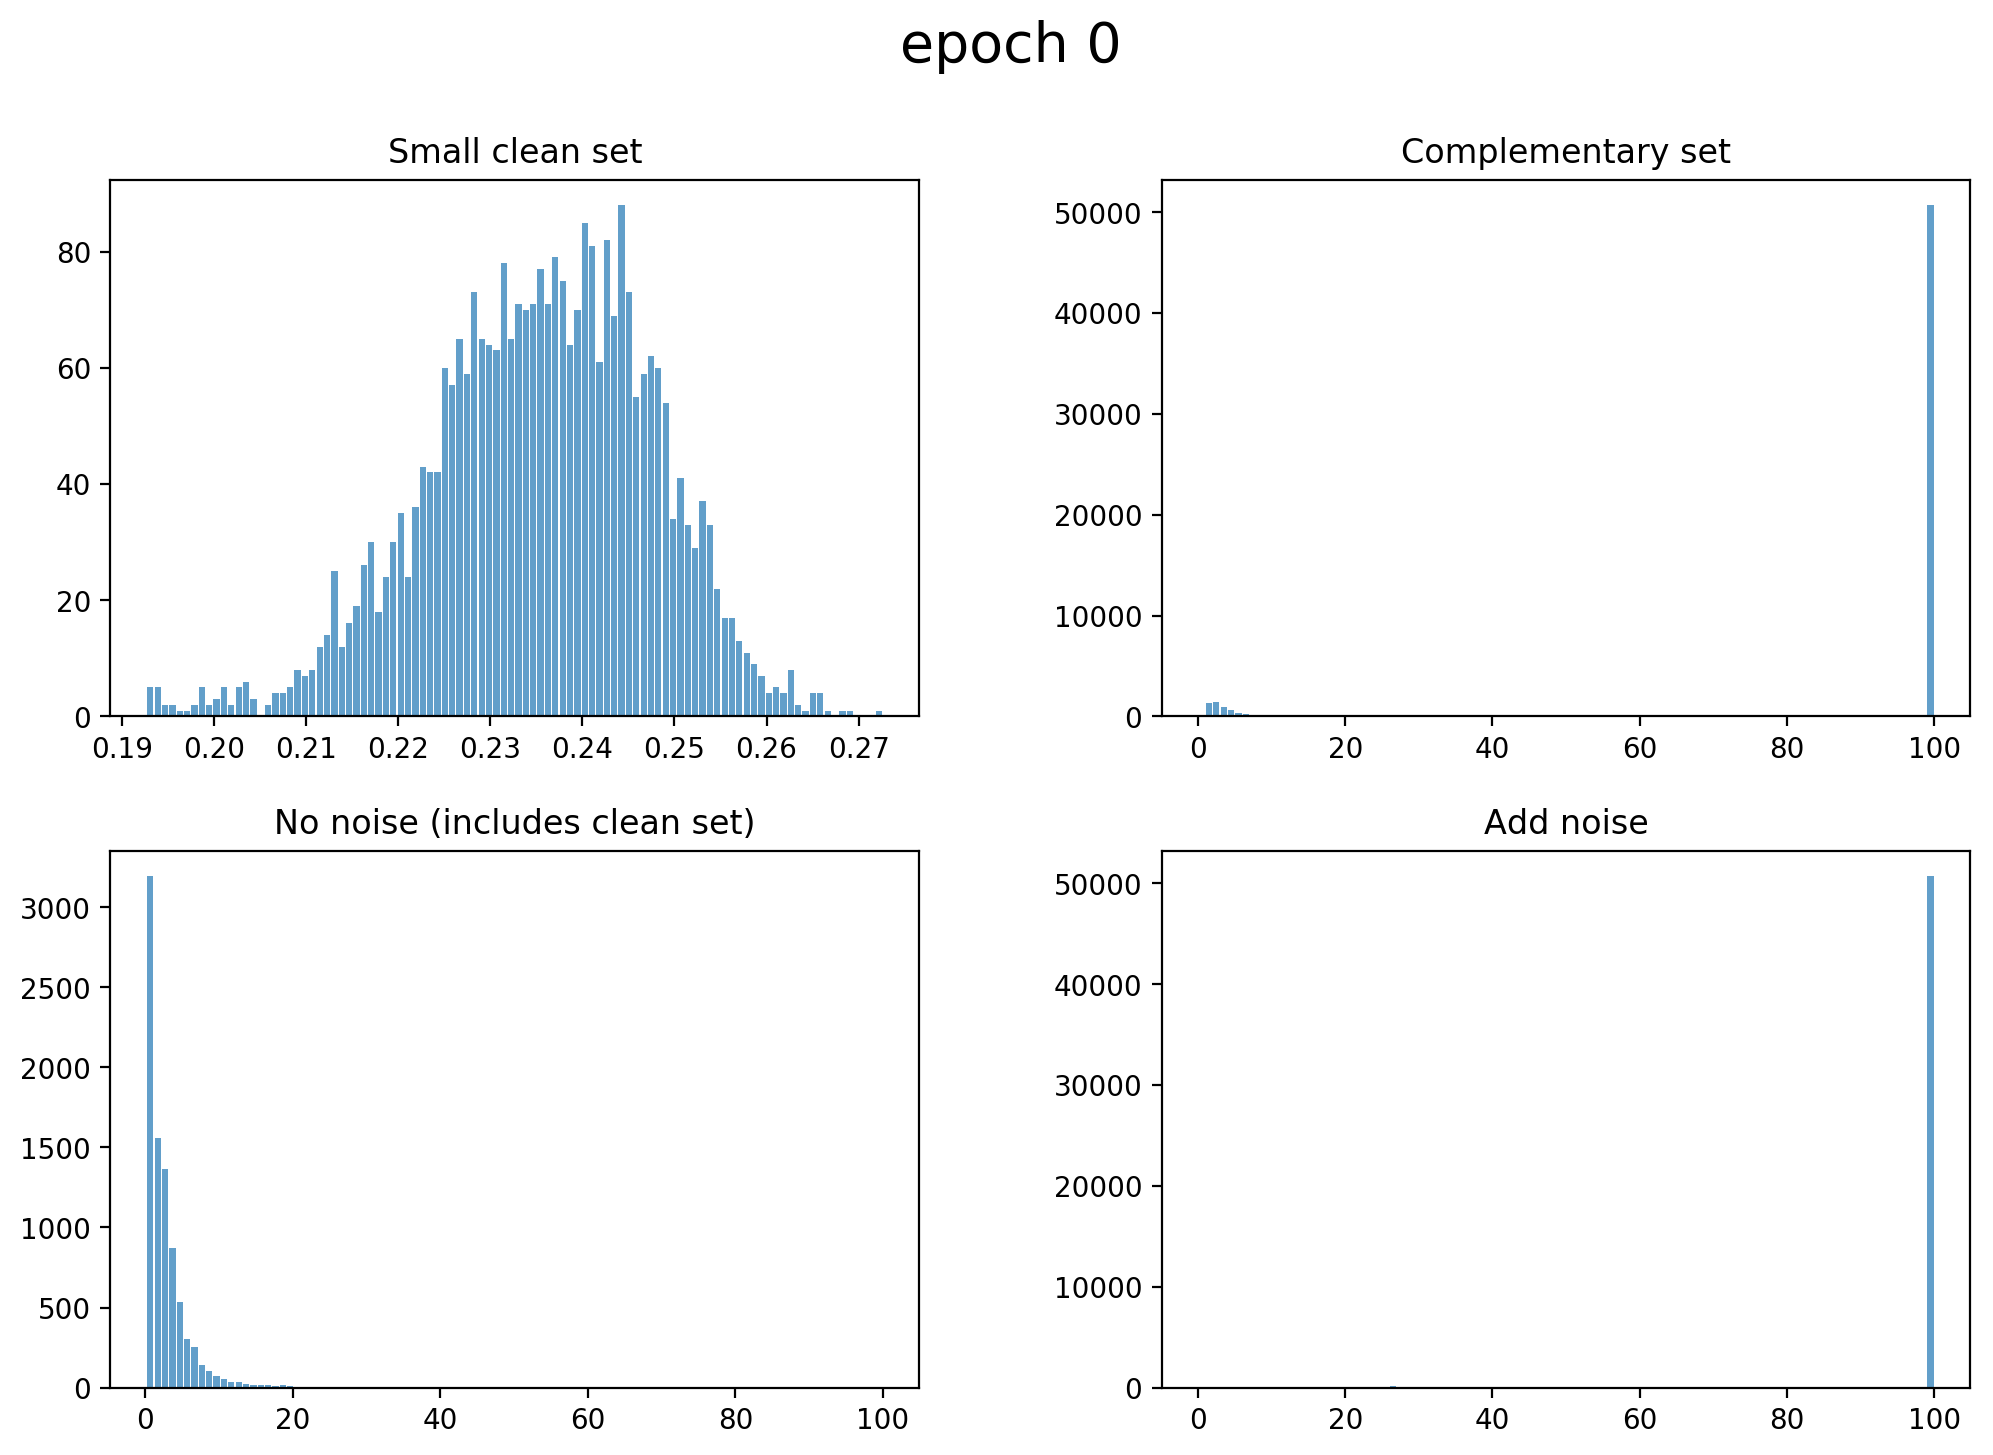

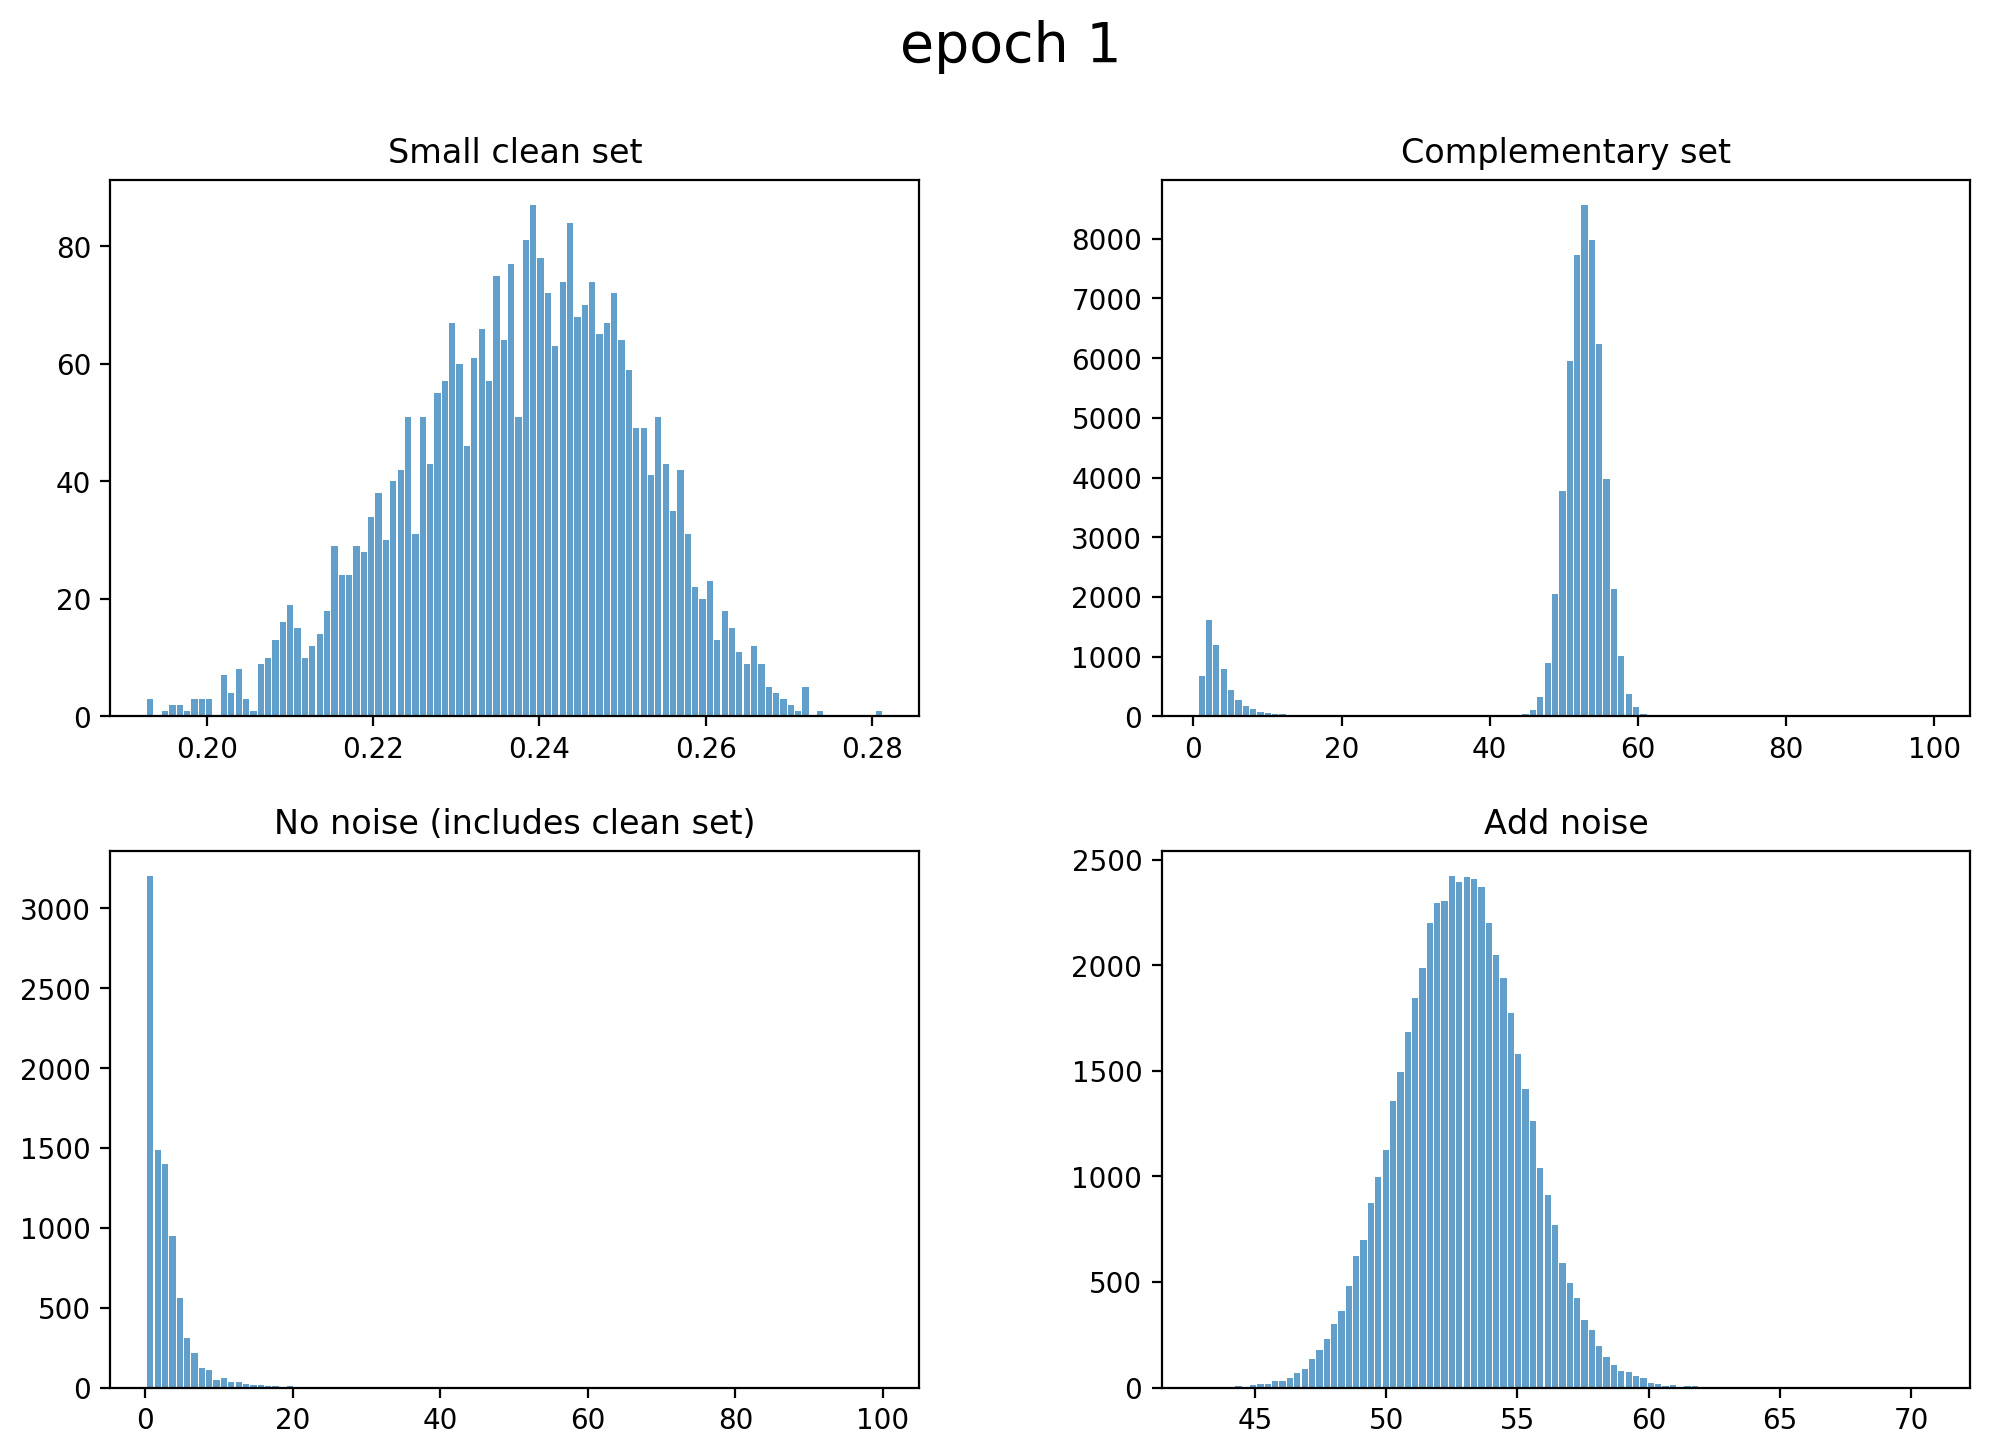

FileNotFoundError: [Errno 2] File b'record/noise_0.90_sigma_20.0_n_2/epoch2.csv' does not exist: b'record/noise_0.90_sigma_20.0_n_2/epoch2.csv'

In [143]:
noise_level = 0.9
noise_sigma = 20
latent_size = 2
path = 'record/noise_%.2f_sigma_%.1f_n_%d'%(noise_level, noise_sigma, latent_size)

clean_process = []
noise_process = []
add_noise_process = []
no_noise_process = []

for epoch in range(10):
    data=pd.read_csv(path + '/epoch%d.csv'%epoch)
    clean_lid = data[(data['clean']==True)]['0'].dropna().to_numpy()
    noise_lid = data[(data['clean']==False)]['0'].dropna().to_numpy()
    add_noise_lid = data[(data['add_noise']==1) & (data['clean']==False)]['0'].dropna().to_numpy()
    no_noise_lid = data[((data['add_noise']==1) & (data['clean']==True)) | (data['add_noise']==0)]['0'].dropna().to_numpy()
    
    clean_lid = np.clip(clean_lid, 0, 100)
    noise_lid = np.clip(noise_lid, 0, 100)
    add_noise_lid = np.clip(add_noise_lid, 0, 100)
    no_noise_lid = np.clip(no_noise_lid, 0, 100)
    
    clean_process.append(np.mean(clean_lid))
    noise_process.append(np.mean(noise_lid))
    add_noise_process.append(np.mean(add_noise_lid))
    no_noise_process.append(np.mean(no_noise_lid))
    
    plt.figure(figsize=(12, 8))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.25)
    plt.subplot(221)
    plt.hist(clean_lid, bins=100, density=False, alpha=0.7, rwidth=0.85)
    plt.title('Small clean set')
    plt.subplot(222)
    plt.hist(noise_lid, bins=100, density=False, alpha=0.7, rwidth=0.85)
    plt.title('Complementary set')
    plt.subplot(223)
    plt.hist(no_noise_lid, bins=100, alpha=0.7, rwidth=0.85)
    plt.title('No noise (includes clean set)')
    plt.subplot(224)
    plt.hist(add_noise_lid, bins=100, alpha=0.7, rwidth=0.85)
    plt.title('Add noise')
    plt.suptitle('epoch %d'%epoch, fontsize=20)
    plt.show()
    
plt.plot(range(1,11), clean_process, label='Small clean set')
plt.plot(range(1,11), noise_process, label='Complementary set')
plt.plot(range(1,11), no_noise_process, label='No noise')
plt.plot(range(1,11), add_noise_process, label='Add noise')
plt.legend()
plt.xlabel('epoch')
plt.title('Average LID Score over the Training Process')
plt.show()

In [144]:
noise_level = 0.5
noise_sigma = 5
latent_size = 20
path = 'record/noise_%.2f_sigma_%.1f_n_%d'%(noise_level, noise_sigma, latent_size)

clean_process = []
noise_process = []
add_noise_process = []
no_noise_process = []

for epoch in range(10):
    data=pd.read_csv(path + '/epoch%d.csv'%epoch)
    clean_lid = data[(data['clean']==True)]['0'].dropna().to_numpy()
    noise_lid = data[(data['clean']==False)]['0'].dropna().to_numpy()
    add_noise_lid = data[(data['add_noise']==1) & (data['clean']==False)]['0'].dropna().to_numpy()
    no_noise_lid = data[((data['add_noise']==1) & (data['clean']==True)) | (data['add_noise']==0)]['0'].dropna().to_numpy()
    
    clean_lid = np.clip(clean_lid, 0, 100)
    noise_lid = np.clip(noise_lid, 0, 100)
    add_noise_lid = np.clip(add_noise_lid, 0, 100)
    no_noise_lid = np.clip(no_noise_lid, 0, 100)
    
    clean_process.append(np.mean(clean_lid))
    noise_process.append(np.mean(noise_lid))
    add_noise_process.append(np.mean(add_noise_lid))
    no_noise_process.append(np.mean(no_noise_lid))
    
    plt.figure(figsize=(12, 8))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.25)
    plt.subplot(221)
    plt.hist(clean_lid, bins=100, density=False, alpha=0.7, rwidth=0.85)
    plt.title('Small clean set')
    plt.subplot(222)
    plt.hist(noise_lid, bins=100, density=False, alpha=0.7, rwidth=0.85)
    plt.title('Complementary set')
    plt.subplot(223)
    plt.hist(no_noise_lid, bins=100, alpha=0.7, rwidth=0.85)
    plt.title('No noise (includes clean set)')
    plt.subplot(224)
    plt.hist(add_noise_lid, bins=100, alpha=0.7, rwidth=0.85)
    plt.title('Add noise')
    plt.suptitle('epoch %d'%epoch, fontsize=20)
    plt.show()
    
plt.plot(range(1,11), clean_process, label='Small clean set')
plt.plot(range(1,11), noise_process, label='Complementary set')
plt.plot(range(1,11), no_noise_process, label='No noise')
plt.plot(range(1,11), add_noise_process, label='Add noise')
plt.legend()
plt.xlabel('epoch')
plt.title('Average LID Score over the Training Process')
plt.show()

FileNotFoundError: [Errno 2] File b'record/noise_0.50_sigma_5.0_n_20/epoch0.csv' does not exist: b'record/noise_0.50_sigma_5.0_n_20/epoch0.csv'